#Preparação


In [ ]:
rm ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
rmdir ~/.kaggle

rmdir: failed to remove '/root/.kaggle': No such file or directory


In [ ]:
pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import requests
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.offline as py
import plotly.graph_objs as go
import os
import shutil
from sklearn.utils import resample
from plotly.offline import plot, iplot
from google.colab import files
import cufflinks as cf 
cf.go_offline()
py.offline.init_notebook_mode(connected = True)
import plotly.io as pio
pio.renderers
pio.renderers.default = 'colab'

In [ ]:
!mkdir ~/.kaggle

api_token = {"username":"username","key":"api-key"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

##Pegando os data sets de 2015





In [ ]:
import os 
os.environ['KAGGLE_CONFIG_DIR'] = '/content/sample_data'

In [ ]:
!kaggle datasets download -d arturbritosouza/fies-para-a-pesquisa

 99% 1.70G/1.72G [00:11<00:00, 219MB/s]
100% 1.72G/1.72G [00:11<00:00, 165MB/s]


In [ ]:
!unzip -j "/content/fies-para-a-pesquisa.zip" "FINANCIAMENTO_CONCEDIDOS_SEMESTRE_1_2015.csv" 
!unzip -j "/content/fies-para-a-pesquisa.zip" "FINANCIAMENTO_CONCEDIDOS_SEMESTRE_2_2015.csv" 

Archive:  /content/fies-para-a-pesquisa.zip
  inflating: FINANCIAMENTO_CONCEDIDOS_SEMESTRE_1_2015.csv  
Archive:  /content/fies-para-a-pesquisa.zip
  inflating: FINANCIAMENTO_CONCEDIDOS_SEMESTRE_2_2015.csv  


#Colocando em datasets para analisar


In [ ]:
fields = [
'SG_UF', 'ST_DEFICIENCIA', 'DS_RACA_COR', 'ST_ENSINO_MEDIO_ESCOLA_PUBLICA', 'DS_TIPO_CURSO', 'DS_CURSO', 'DS_SEXO', 'NO_IES',
'NO_MUNICIPIO', 'NO_AGENTE_FINANCEIRO', 'DS_ESTADO_CIVIL', 'DS_PERIODICIDADE_CUR', 'NU_ANO_PROC', 'NU_MES_PROC' , 'NU_SEMESTRE',
'NU_MES',  'NU_ANO', 'TP_FIANCA', 'VL_REPASSE', 'CO_CONTRATO_FIES', 'VL_PERC_FINANCIAMENTO', 'QT_SEMESTRE_FINANCIADO', 'DT_NASCIMENTO',
'CO_PROCESSO', 'NU_ANO_EXERCICIO_INSC', 'NU_PERCENTUAL_PROUNI', 'NU_PERCENT_SOLICITADO_FINANC', 'VL_MENSALIDADE'
]

In [ ]:
df5 = pd.read_csv('FINANCIAMENTO_CONCEDIDOS_SEMESTRE_1_2015.csv', encoding="ISO-8859-1", sep = ';', usecols=fields)
df14 = pd.read_csv('FINANCIAMENTO_CONCEDIDOS_SEMESTRE_2_2015.csv', encoding="ISO-8859-1", sep = ';', usecols=fields)

In [ ]:
pd.set_option('display.max_columns', 50)
df5

,SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,TP_FIANCA,NU_ANO_EXERCICIO_INSC,NU_PERCENTUAL_PROUNI,NU_PERCENT_SOLICITADO_FINANC,VL_REPASSE,DT_NASCIMENTO,ST_DEFICIENCIA,ST_ENSINO_MEDIO_ESCOLA_PUBLICA,DS_SEXO,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC
0,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,111,2321414,Banco do Brasil,1,1,2015,"1060,8",F,2015.0,0.0,100.0,"24905,2",9/01/1986 00:00:00,N,S,Masculino,Solteiro,Negro,100.0,10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2015,5
1,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,111,2321414,Banco do Brasil,3,1,2015,"1060,8",F,2015.0,0.0,100.0,"24905,2",9/01/1986 00:00:00,N,S,Masculino,Solteiro,Negro,100.0,10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2015,5
2,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,111,2321414,Banco do Brasil,4,1,2015,"1060,8",F,2015.0,0.0,100.0,"24905,2",9/01/1986 00:00:00,N,S,Masculino,Solteiro,Negro,100.0,10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2015,5
3,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,111,2321414,Banco do Brasil,2,1,2015,"1060,8",F,2015.0,0.0,100.0,"24905,2",9/01/1986 00:00:00,N,S,Masculino,Solteiro,Negro,100.0,10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2015,5
4,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,112,2321414,Banco do Brasil,5,1,2015,"1060,8",F,2015.0,0.0,100.0,"24905,2",9/01/1986 00:00:00,N,S,Masculino,Solteiro,Negro,100.0,10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2015,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5934424,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,109,2245468,Banco do Brasil,2,1,2015,774,N,2015.0,0.0,100.0,"18629,03",27/02/1996 00:00:00,N,S,Feminino,Solteiro,Pardo,100.0,9.0,ENFERMAGEM,Bacharelado,Semestral,2015,4
5934425,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,109,2245468,Banco do Brasil,3,1,2015,774,N,2015.0,0.0,100.0,"18629,03",27/02/1996 00:00:00,N,S,Feminino,Solteiro,Pardo,100.0,9.0,ENFERMAGEM,Bacharelado,Semestral,2015,4
5934426,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,111,2245468,Banco do Brasil,4,1,2015,774,N,2015.0,0.0,100.0,"18629,03",27/02/1996 00:00:00,N,S,Feminino,Solteiro,Pardo,100.0,9.0,ENFERMAGEM,Bacharelado,Semestral,2015,5
5934427,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,112,2245468,Banco do Brasil,5,1,2015,774,N,2015.0,0.0,100.0,"18629,03",27/02/1996 00:00:00,N,S,Feminino,Solteiro,Pardo,100.0,9.0,ENFERMAGEM,Bacharelado,Semestral,2015,6


In [ ]:
pd.set_option('display.max_columns', 50)
df14

,SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,TP_FIANCA,NU_ANO_EXERCICIO_INSC,NU_PERCENTUAL_PROUNI,NU_PERCENT_SOLICITADO_FINANC,VL_REPASSE,DT_NASCIMENTO,ST_DEFICIENCIA,ST_ENSINO_MEDIO_ESCOLA_PUBLICA,DS_SEXO,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC
0,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,148,2321414,Banco do Brasil,7,2,2015,"1060,8",F,2015.0,0.0,100.0,"24905,2",9/01/1986 00:00:00,N,S,Masculino,Solteiro,Negro,100.0,10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2015,10
1,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,148,2321414,Banco do Brasil,8,2,2015,"1060,8",F,2015.0,0.0,100.0,"24905,2",9/01/1986 00:00:00,N,S,Masculino,Solteiro,Negro,100.0,10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2015,10
2,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,148,2321414,Banco do Brasil,9,2,2015,"1060,8",F,2015.0,0.0,100.0,"24905,2",9/01/1986 00:00:00,N,S,Masculino,Solteiro,Negro,100.0,10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2015,10
3,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,154,2321414,Banco do Brasil,10,2,2015,"1060,8",F,2015.0,0.0,100.0,"24905,2",9/01/1986 00:00:00,N,S,Masculino,Solteiro,Negro,100.0,10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2015,11
4,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,163,2321414,Banco do Brasil,11,2,2015,"1060,8",F,2015.0,0.0,100.0,"24905,2",9/01/1986 00:00:00,N,S,Masculino,Solteiro,Negro,100.0,10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2015,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8523001,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,168,2441675,Caixa Econômica Federal,9,2,2015,825,N,2015.0,0.0,80.0,"14519,56",24/08/1997 00:00:00,N,S,Feminino,Solteiro,Pardo,80.0,10.0,ENGENHARIA CIVIL,Bacharelado,Semestral,2016,1
8523002,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,168,2441675,Caixa Econômica Federal,11,2,2015,825,N,2015.0,0.0,80.0,"14519,56",24/08/1997 00:00:00,N,S,Feminino,Solteiro,Pardo,80.0,10.0,ENGENHARIA CIVIL,Bacharelado,Semestral,2016,1
8523003,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,168,2441675,Caixa Econômica Federal,7,2,2015,825,N,2015.0,0.0,80.0,"14519,56",24/08/1997 00:00:00,N,S,Feminino,Solteiro,Pardo,80.0,10.0,ENGENHARIA CIVIL,Bacharelado,Semestral,2016,1
8523004,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,168,2441675,Caixa Econômica Federal,12,2,2015,"825,04",N,2015.0,0.0,80.0,"14519,56",24/08/1997 00:00:00,N,S,Feminino,Solteiro,Pardo,80.0,10.0,ENGENHARIA CIVIL,Bacharelado,Semestral,2016,1


In [ ]:
pd.reset_option("^display")

#Tratamento inicial.

###Crindo uma palheta de cores.

In [ ]:
cores = ['#009739', '#FEDD00', '#012169', '#FFFFFF', '#fe9e00', '#e0fe00', '#00fedd', '#0021fe', '#5e00fe', 
         '#dd00fe',  '#131000', '#898675', '#ffd4de', '#fed78d', '#867589', '#fe0021', '#00a0fe', '#3333ff',
         '#336600', '#660033', '#003a32', '#fe0060', '#260005', '#666699', '#66ff99', '#99ffcc', '#ccff99' ]

##Com os dados de 2015.1

###Retirando as repetições

In [ ]:
repeticoes = df5['CO_CONTRATO_FIES'].value_counts()
def custom_rating(contrato):
        return repeticoes[contrato]
        
df5['MESES_CONSEDIDOS'] = df5.apply(lambda x: custom_rating(x['CO_CONTRATO_FIES']),axis=1)

df5

,SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,...,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
0,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,111,2321414,Banco do Brasil,1,1,2015,"1060,8",...,Solteiro,Negro,100.0,10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2015,5,6
1,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,111,2321414,Banco do Brasil,3,1,2015,"1060,8",...,Solteiro,Negro,100.0,10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2015,5,6
2,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,111,2321414,Banco do Brasil,4,1,2015,"1060,8",...,Solteiro,Negro,100.0,10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2015,5,6
3,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,111,2321414,Banco do Brasil,2,1,2015,"1060,8",...,Solteiro,Negro,100.0,10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2015,5,6
4,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,112,2321414,Banco do Brasil,5,1,2015,"1060,8",...,Solteiro,Negro,100.0,10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2015,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5934424,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,109,2245468,Banco do Brasil,2,1,2015,774,...,Solteiro,Pardo,100.0,9.0,ENFERMAGEM,Bacharelado,Semestral,2015,4,6
5934425,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,109,2245468,Banco do Brasil,3,1,2015,774,...,Solteiro,Pardo,100.0,9.0,ENFERMAGEM,Bacharelado,Semestral,2015,4,6
5934426,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,111,2245468,Banco do Brasil,4,1,2015,774,...,Solteiro,Pardo,100.0,9.0,ENFERMAGEM,Bacharelado,Semestral,2015,5,6
5934427,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,112,2245468,Banco do Brasil,5,1,2015,774,...,Solteiro,Pardo,100.0,9.0,ENFERMAGEM,Bacharelado,Semestral,2015,6,6


In [ ]:
df5DuplicateRows = df5[df5.duplicated(subset='CO_CONTRATO_FIES')]
df5DuplicateRows

,SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,...,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
1,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,111,2321414,Banco do Brasil,3,1,2015,"1060,8",...,Solteiro,Negro,100.0,10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2015,5,6
2,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,111,2321414,Banco do Brasil,4,1,2015,"1060,8",...,Solteiro,Negro,100.0,10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2015,5,6
3,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,111,2321414,Banco do Brasil,2,1,2015,"1060,8",...,Solteiro,Negro,100.0,10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2015,5,6
4,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,112,2321414,Banco do Brasil,5,1,2015,"1060,8",...,Solteiro,Negro,100.0,10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2015,6,6
5,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,115,2321414,Banco do Brasil,6,1,2015,"1060,8",...,Solteiro,Negro,100.0,10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2015,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5934424,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,109,2245468,Banco do Brasil,2,1,2015,774,...,Solteiro,Pardo,100.0,9.0,ENFERMAGEM,Bacharelado,Semestral,2015,4,6
5934425,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,109,2245468,Banco do Brasil,3,1,2015,774,...,Solteiro,Pardo,100.0,9.0,ENFERMAGEM,Bacharelado,Semestral,2015,4,6
5934426,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,111,2245468,Banco do Brasil,4,1,2015,774,...,Solteiro,Pardo,100.0,9.0,ENFERMAGEM,Bacharelado,Semestral,2015,5,6
5934427,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,112,2245468,Banco do Brasil,5,1,2015,774,...,Solteiro,Pardo,100.0,9.0,ENFERMAGEM,Bacharelado,Semestral,2015,6,6


In [ ]:
df5ComLinhasDuplicads = df5
df5 = df5.drop_duplicates(subset='CO_CONTRATO_FIES')

In [ ]:
df5

,SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,...,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
0,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,111,2321414,Banco do Brasil,1,1,2015,"1060,8",...,Solteiro,Negro,100.0,10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2015,5,6
6,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,115,2403582,Banco do Brasil,3,1,2015,696,...,Casado,Pardo,100.0,10.0,DIREITO,Bacharelado,Anual,2015,7,6
12,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,111,412783,Banco do Brasil,1,1,2015,"397,6",...,Solteiro,Pardo,100.0,8.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2015,5,6
18,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,111,188732,Caixa Econômica Federal,2,1,2015,"265,2",...,Solteiro,Pardo,50.0,9.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2015,5,6
24,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,109,442255,Caixa Econômica Federal,1,1,2015,440,...,Solteiro,Branco,100.0,8.0,CIÊNCIAS CONTÁBEIS,Bacharelado,Anual,2015,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5934399,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,109,2186134,Caixa Econômica Federal,3,1,2015,"751,42",...,Solteiro,Pardo,100.0,7.0,ENFERMAGEM,Bacharelado,Semestral,2015,4,6
5934405,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,109,2245466,Banco do Brasil,2,1,2015,"870,26",...,Solteiro,Pardo,100.0,10.0,ENGENHARIA CIVIL,Bacharelado,Semestral,2015,4,6
5934411,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,109,2260600,Caixa Econômica Federal,1,1,2015,"746,91",...,Solteiro,Pardo,100.0,10.0,ENFERMAGEM,Bacharelado,Semestral,2015,4,6
5934417,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,112,2358304,Caixa Econômica Federal,1,1,2015,"754,53",...,Solteiro,Branco,90.0,8.0,ENGENHARIA CIVIL,Bacharelado,Semestral,2015,6,6


In [ ]:
df5ComLinhasDuplicads['CO_CONTRATO_FIES'].value_counts()

178560     84
734140     61
1281541    54
128559     48
161487     48
           ..
1064187     1
803281      1
750141      1
854210      1
1525399     1
Name: CO_CONTRATO_FIES, Length: 1311145, dtype: int64

###Retirando as linhas que possuem valores nulos

In [ ]:
df5.describe()

,CO_PROCESSO,CO_CONTRATO_FIES,NU_MES,NU_SEMESTRE,NU_ANO,NU_ANO_EXERCICIO_INSC,NU_PERCENTUAL_PROUNI,NU_PERCENT_SOLICITADO_FINANC,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
count,1.311145e+06,1.311145e+06,1.311145e+06,1.311145e+06,1.311145e+06,1.311144e+06,1.310957e+06,1.311144e+06,1.311144e+06,1.311144e+06,1311145.0,1.311145e+06,1.311145e+06
mean,1.084992e+02,1.470500e+06,6.291926e+00,1.420051e+00,2.014575e+03,2.013480e+03,8.951667e-01,9.419482e+01,9.419482e+01,8.389040e+00,2015.0,3.604605e+00,4.526142e+00
std,2.630554e+00,6.047410e+05,4.792223e+00,4.935670e-01,5.003906e-01,1.078979e+00,6.629903e+00,1.401068e+01,1.401068e+01,2.029926e+00,0.0,1.585228e+00,2.166897e+00
min,1.050000e+02,1.111870e+05,1.000000e+00,1.000000e+00,2.010000e+03,2.004000e+03,0.000000e+00,5.000000e+01,5.000000e+01,1.000000e+00,2015.0,2.000000e+00,1.000000e+00
25%,1.060000e+02,9.835900e+05,2.000000e+00,1.000000e+00,2.014000e+03,2.013000e+03,0.000000e+00,1.000000e+02,1.000000e+02,8.000000e+00,2015.0,2.000000e+00,3.000000e+00
50%,1.090000e+02,1.532174e+06,4.000000e+00,1.000000e+00,2.015000e+03,2.014000e+03,0.000000e+00,1.000000e+02,1.000000e+02,9.000000e+00,2015.0,4.000000e+00,6.000000e+00
75%,1.110000e+02,2.004357e+06,1.200000e+01,2.000000e+00,2.015000e+03,2.014000e+03,0.000000e+00,1.000000e+02,1.000000e+02,1.000000e+01,2015.0,5.000000e+00,6.000000e+00
max,1.150000e+02,2.403720e+06,1.200000e+01,2.000000e+00,2.015000e+03,2.015000e+03,5.000000e+01,1.000000e+02,1.000000e+02,1.900000e+01,2015.0,7.000000e+00,8.400000e+01


In [ ]:
df5.isnull().sum().sort_values(ascending=False)

DS_ESTADO_CIVIL                   6952
DS_SEXO                           6936
ST_ENSINO_MEDIO_ESCOLA_PUBLICA    6936
ST_DEFICIENCIA                    6936
DT_NASCIMENTO                     6936
DS_RACA_COR                       6936
NU_PERCENTUAL_PROUNI               188
DS_PERIODICIDADE_CUR                18
DS_TIPO_CURSO                       18
DS_CURSO                            18
NU_PERCENT_SOLICITADO_FINANC         1
VL_REPASSE                           1
NU_ANO_EXERCICIO_INSC                1
TP_FIANCA                            1
QT_SEMESTRE_FINANCIADO               1
NO_IES                               1
VL_PERC_FINANCIAMENTO                1
NU_ANO_PROC                          0
NU_MES_PROC                          0
SG_UF                                0
NO_MUNICIPIO                         0
VL_MENSALIDADE                       0
NU_ANO                               0
NU_SEMESTRE                          0
NU_MES                               0
NO_AGENTE_FINANCEIRO     

In [ ]:
df5.dropna(axis=0, inplace=True)

In [ ]:
df5.isnull().sum().sort_values(ascending=False)

SG_UF                             0
DT_NASCIMENTO                     0
NU_MES_PROC                       0
NU_ANO_PROC                       0
DS_PERIODICIDADE_CUR              0
DS_TIPO_CURSO                     0
DS_CURSO                          0
QT_SEMESTRE_FINANCIADO            0
VL_PERC_FINANCIAMENTO             0
DS_RACA_COR                       0
DS_ESTADO_CIVIL                   0
DS_SEXO                           0
ST_ENSINO_MEDIO_ESCOLA_PUBLICA    0
ST_DEFICIENCIA                    0
VL_REPASSE                        0
NO_MUNICIPIO                      0
NU_PERCENT_SOLICITADO_FINANC      0
NU_PERCENTUAL_PROUNI              0
NU_ANO_EXERCICIO_INSC             0
TP_FIANCA                         0
VL_MENSALIDADE                    0
NU_ANO                            0
NU_SEMESTRE                       0
NU_MES                            0
NO_AGENTE_FINANCEIRO              0
CO_CONTRATO_FIES                  0
CO_PROCESSO                       0
NO_IES                      

In [ ]:
df5.describe()

,CO_PROCESSO,CO_CONTRATO_FIES,NU_MES,NU_SEMESTRE,NU_ANO,NU_ANO_EXERCICIO_INSC,NU_PERCENTUAL_PROUNI,NU_PERCENT_SOLICITADO_FINANC,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
count,1.303993e+06,1.303993e+06,1.303993e+06,1.303993e+06,1.303993e+06,1.303993e+06,1.303993e+06,1.303993e+06,1.303993e+06,1.303993e+06,1303993.0,1.303993e+06,1.303993e+06
mean,1.084983e+02,1.468979e+06,6.306216e+00,1.421432e+00,2.014574e+03,2.013477e+03,8.964964e-01,9.418273e+01,9.418273e+01,8.384251e+00,2015.0,3.603621e+00,4.521216e+00
std,2.633033e+00,6.049870e+05,4.793247e+00,4.937886e-01,5.006318e-01,1.079467e+00,6.634735e+00,1.402299e+01,1.402299e+01,2.032197e+00,0.0,1.586904e+00,2.169157e+00
min,1.050000e+02,1.111870e+05,1.000000e+00,1.000000e+00,2.010000e+03,2.004000e+03,0.000000e+00,5.000000e+01,5.000000e+01,1.000000e+00,2015.0,2.000000e+00,1.000000e+00
25%,1.060000e+02,9.816440e+05,2.000000e+00,1.000000e+00,2.014000e+03,2.013000e+03,0.000000e+00,1.000000e+02,1.000000e+02,8.000000e+00,2015.0,2.000000e+00,3.000000e+00
50%,1.090000e+02,1.530447e+06,4.000000e+00,1.000000e+00,2.015000e+03,2.014000e+03,0.000000e+00,1.000000e+02,1.000000e+02,9.000000e+00,2015.0,4.000000e+00,6.000000e+00
75%,1.110000e+02,2.002937e+06,1.200000e+01,2.000000e+00,2.015000e+03,2.014000e+03,0.000000e+00,1.000000e+02,1.000000e+02,1.000000e+01,2015.0,5.000000e+00,6.000000e+00
max,1.150000e+02,2.403720e+06,1.200000e+01,2.000000e+00,2.015000e+03,2.015000e+03,5.000000e+01,1.000000e+02,1.000000e+02,1.900000e+01,2015.0,7.000000e+00,8.400000e+01


###Criando a coluna de região, baseado nos estados.

In [ ]:
df5['REGIAO'] = df5['SG_UF']

In [ ]:
df5['REGIAO']= df5['REGIAO'].replace(['AM','RR', 'AP', 'PA', 'TO', 'RO', 'AC'], 'NORTE')
df5['REGIAO']= df5['REGIAO'].replace(['MA','PI', 'CE', 'RN', 'PB', 'PE', 'SE', 'AL', 'BA'], 'NORDESTE')
df5['REGIAO']= df5['REGIAO'].replace(['MT','MS', 'GO', 'DF'], 'CENTRO-OESTE')
df5['REGIAO']= df5['REGIAO'].replace(['SP','RJ', 'ES', 'MG'], 'SUDESTE')
df5['REGIAO']= df5['REGIAO'].replace(['PR','RS', 'SC'], 'SUL')

###Criando a coluna categoria de ciencia do curso, para separar os cursos em 8 categorias definidas pela capes

In [ ]:
df5['CATEGORIA_CIENCIA_CURSO'] = df5['DS_CURSO']

In [ ]:
df5['CATEGORIA_CIENCIA_CURSO']= df5['CATEGORIA_CIENCIA_CURSO'].replace(['DIREITO','ADMINISTRAÇÃO', 'CIÊNCIAS CONTÁBEIS', 'ARQUITETURA E URBANISMO',
'DESIGN GRÁFICO', 'SERVIÇO SOCIAL', 'COMUNICAÇÃO SOCIAL - PUBLICIDADE E PROPAGANDA', 'JORNALISMO', 'GESTÃO DE RECURSOS HUMANOS','COMÉRCIO INTERNACIONAL', 
'RELAÇÕES INTERNACIONAIS','GASTRONOMIA', 'COMUNICAÇÃO SOCIAL', 'CIÊNCIAS ECONÔMICAS', 'PUBLICIDADE E PROPAGANDA', 'COMUNICAÇÃO SOCIAL - JORNALISMO', 
'DESIGN DE INTERIORES', 'EVENTOS', 'MARKETING', 'GESTÃO DA TECNOLOGIA DA INFORMAÇÃO', 'TURISMO', 'GESTÃO FINANCEIRA', 'RELAÇÕES PÚBLICAS', 
'BIBLIOTECONOMIA', 'GESTÃO COMERCIAL', 'COMÉRCIO EXTERIOR', 'PROCESSOS GERENCIAIS', 'SEGURANÇA NO TRABALHO', 'GESTÃO DA PRODUÇÃO INDUSTRIAL', 
'TERAPIA OCUPACIONAL', 'HOTELARIA', 'COMUNICAÇÃO SOCIAL - RELAÇÕES PÚBLICAS', 'SECRETARIADO EXECUTIVO', 'DESIGN DE PRODUTO', 'DESENHO INDUSTRIAL', 
'CIÊNCIAS SOCIAIS', 'GESTÃO DA QUALIDADE', 'NEGÓCIOS INTERNACIONAIS', 'COMUNICAÇÃO SOCIAL -RADIALISMO - PRODUÇÃO EM MÍDIA AUDIOVISUAL', 
'PROPAGANDA E MARKETING', 'GESTÃO DE SEGURANÇA PRIVADA', 'GESTÃO HOSPITALAR', 'GESTÃO PÚBLICA', 'GESTÃO PORTUÁRIA', 'SECRETARIADO', 
'SECRETARIADO EXECUTIVO TRILÍNGUE', 'ADMINISTRAÇÃO DE EMPRESAS', 'RÁDIO, TV E INTERNET', 'GESTÃO DE MICRO E PEQUENAS EMPRESAS', 'TURISMO E HOTELARIA',
'DESENHO INDUSTRIAL - DESIGN DIGITAL', 'PRODUÇÃO PUBLICITÁRIA', 'GESTÃO FINANCEIRA E CONTROLADORIA EMPRESARIAL', 'NEGÓCIOS DA MODA', 
'TELEMÁTICA', 'NEGÓCIOS IMOBILIÁRIOS', 'SECRETARIADO EXECUTIVO BILÍNGUE', 'MARKETING E PROPAGANDA', 'COMUNICAÇÃO E MULTIMEIOS', ''
'CIÊNCIA POLÍTICA', 'SEGURANÇA PÚBLICA', 'ADMINISTRAÇÃO PÚBLICA', 'GESTÃO DE VAREJO', 'GESTÃO DE PESSOAS', 'DESENHO INDUSTRIAL - PROJETO DO PRODUTO',
'DESENHO INDUSTRIAL - PROGRAMAÇÃO VISUAL', 'CIÊNCIA ECONÔMICA', 'COMUNICAÇÃO ASSISTIVA', 'SEGURANÇA DO TRABALHO', 'DESENHO INDUSTRIAL - DESIGN DE MODA',
'ESTUDOS SOCIAIS', 'ADMINISTRAÇÃO COM HABILITAÇÃO EM ADMINISTRAÇÃO DE EMPRESAS', 'PSICOPEDAGOGIA CLÍNICA E INSTITUCIONAL', 'GESTÃO DE PRODUÇÃO INDUSTRIAL',
'GESTÃO EMPRESARIAL E CONTROLADORIA', 'GESTÃO DE TURISMO', 'CIÊNCIAS POLÍTICAS', 'TURISMO E LAZER', 'GESTÃO DE TECNOLOGIA DA INFORMAÇÃO', 
'GESTÃO DA QUALIDADE E SEGURANÇA DO TRABALHO', 'GESTÃO DE QUALIDADE EM METROLOGIA', 'LOGÍSTICA', 'SECRETARIADO EXECUTIVO - BILÍNGUE', 'GESTÃO DO AGRONEGÓCIO',
'COMUNICAÇÃO SOCIAL COM HABILITAÇÃO EM PUBLICIDADE E PROPAGANDA', 'COMUNICAÇÃO E MARKETING', 'SEGURANÇA PRIVADA', 'GESTÃO DE TELECOMUNICAÇÕES',
'SERVIÇOS PENAIS', 'NORMAL  SUPERIOR', 'GESTÃO DE SERVIÇOS JUDICIÁRIOS E NOTARIAIS', 'SECRETARIADO EXECUTIVO BILINGUE - PORTUGUÊS/INGLÊS',
'GESTÃO DE SEGUROS', 'ECONOMIA', 'ORGANIZAÇÃO DE SERVIÇOS JUDICIÁRIOS', 'GESTÃO DE COOPERATIVAS', 'COMÉRCIO EXTERIOR E NEGÓCIOS INTERNACIONAIS',
'GESTÃO EXECUTIVA DE NEGÓCIOS', 'HOTELARIA HOSPITALAR', 'GESTÃO DE SISTEMAS DE INFORMAÇÃO', 'PLANEJAMENTO LOGÍSTICO DE CARGAS', 'GESTÃO DE AGRONEGÓCIOS',
'GESTÃO DE TERMINAIS E OPERAÇÃO PORTUÁRIA', 'COMUNICAÇÃO INSTITUCIONAL', 'ADMINISTRAÇÃO EM COMÉRCIO EXTERIOR', 'GESTÃO DE VENDAS', 
'CONTROLE DE OBRAS', 'GESTÃO DE SERVIÇOS EM ATENDIMENTO', 'GESTÃO DE SEGURANÇA PÚBLICA (EXPERIMENTAL)', 'GESTÃO DE SEGURANÇA PÚBLICA',
'RECURSOS HUMANOS', 'SEGURANÇA NO TRÂNSITO', 'QUALIDADE', 'GESTÃO MERCADOLÓGICA', 'SERVIÇOS DE TURISMO', 'TURISMO RECEPTIVO', 'GESTÃO EMPRESARIAL',
'COMUNICAÇÃO SOCIAL COM HABILITAÇÃO EM RELAÇÕES PÚBLICAS', 'GESTÃO DE SERVIÇOS EXECUTIVOS'
], 
'Ciências Sociais Aplicadas')


df5['CATEGORIA_CIENCIA_CURSO']= df5['CATEGORIA_CIENCIA_CURSO'].replace(['ENFERMAGEM','MEDICINA', 'FISIOTERAPIA', 'ODONTOLOGIA',
'FARMÁCIA', 'EDUCAÇÃO FÍSICA', 'NUTRIÇÃO', 'BIOMEDICINA', 'FONOAUDIOLOGIA', 'FARMÁCIA E BIOQUÍMICA', 'QUIROPRAXIA', 'CIÊNCIAS BIOLÓGICAS - MODALIDADE MÉDICA',
'OPTOMETRIA', 'CIÊNCIAS FARMACÊUTICAS', 'ORTÓPTICA', 'FÍSICA MÉDICA', 'COSMÉTICOS', 'VISAGISMO E TERAPIA CAPILAR', 'ESTÉTICA CAPILAR',
'COSMETOLOGIA E ESTÉTICA', 'ESTÉTICA', 'ESTÉTICA E COSMETOLOGIA', 'ESTÉTICA E COSMÉTICA', 'MUSICOTERAPIA', 'ÓPTICA E OPTOMETRIA', 'SAÚDE COLETIVA', 'PODOLOGIA',
'VISAGISMO E TERAPIAS CAPILARES', 'SISTEMAS BIOMÉDICOS', 'ATIVIDADE FÍSICA E ESPORTE', 'OFTÁLMICA', 'RADIOLOGIA MÉDICA', 'ENFERMAGEM E OBSTETRÍCIA'
], 
'Ciências da Saúde')


df5['CATEGORIA_CIENCIA_CURSO']= df5['CATEGORIA_CIENCIA_CURSO'].replace(['SISTEMAS DE INFORMAÇÃO','CIÊNCIA DA COMPUTAÇÃO',
'ANÁLISE E DESENVOLVIMENTO DE SISTEMAS', 'MATEMÁTICA', 'SISTEMA DE INFORMAÇÃO', 'QUÍMICA', 'REDES DE COMPUTADORES', 'PILOTAGEM PROFISSIONAL DE AERONAVES',
'PETRÓLEO E GÁS', 'SISTEMAS PARA INTERNET', 'CIÊNCIAS AERONÁUTICAS', 'AUTOMAÇÃO INDUSTRIAL', 'QUÍMICA INDUSTRIAL', 'MECATRÔNICA INDUSTRIAL', 'FÍSICA',
'JOGOS DIGITAIS', 'MANUTENÇÃO INDUSTRIAL', 'INFORMÁTICA', 'CIÊNCIAS', 'PRODUÇÃO SUCROALCOOLEIRA', 'OCEANOGRAFIA', 'CIÊNCIAS ATUARIAIS', 'CIÊNCIAS EXATAS',
'FABRICAÇÃO MECÂNICA', 'CONSTRUÇÃO NAVAL', 'PROCESSOS QUÍMICOS', 'COMPUTAÇÃO', 'MANUTENÇÃO DE AERONAVES', 'GEOLOGIA', 'CONSTRUÇÃO DE EDIFÍCIOS', 
'AVIAÇÃO CIVIL', 'BIOCOMBUSTÍVEIS', 'TECNOLOGIA DE SOLDAGEM', 'SEGURANÇA DA INFORMAÇÃO', 'ELETROTÉCNICA INDUSTRIAL', 'SISTEMAS DE TELECOMUNICAÇÕES',
'PRODUÇÃO DE PETRÓLEO E GÁS', 'PRODUÇÃO DE VESTUÁRIO', 'SISTEMAS AUTOMOTIVOS', 'WEB DESIGN', 'INSPEÇÃO DE EQUIPAMENTOS E DE SOLDAGEM', 'PROCESSOS METALÚRGICOS',
'POLÍMEROS', 'REDES DE TELECOMUNICAÇÕES', 'BANCO DE DADOS', 'ANÁLISE DE SISTEMAS DE INFORMAÇÃO', 'SISTEMAS ELÉTRICOS', 'GEOGRAFIA E MEIO AMBIENTE',
'QUÍMICA TECNOLÓGICA', 'ANÁLISE DE SISTEMAS', 'GESTÃO DE AMBIENTES INTERNET E REDES DE COMPUTADORES', 'CIÊNCIAS DA COMPUTAÇÃO', 'ENGENHARIA DE SOFTWARE',
'GERENCIAMENTO DE REDES DE COMPUTADORES', 'ELETRÔNICA INDUSTRIAL', 'ENERGIAS RENOVÁVEIS', 'TECNOLOGIAS DIGITAIS', 'COMPUTAÇÃO GRÁFICA',
'SISTEMAS EMBARCADOS', 'DESENVOLVIMENTO DE SISTEMAS', 'BIOENERGIA', 'TRANSPORTE TERRESTRE', 'DESENVOLVIMENTO PARA WEB', 'CIÊNCIAS - QUÍMICA',
'ELETRÔNICA', 'TRANSPORTE AÉREO', 'GESTÃO DE REDES DE COMPUTADORES E INTERNET', 'COMPUTAÇÃO CIENTÍFICA', 'MECÂNICA DE PRECISÃO', 'ESTATÍSTICA',
'TELECOMUNICAÇÕES', 'ANÁLISE E DESENVOLVIMENTO DE SISTEMAS INTERNET', 'COMPUTAÇÃO E INFORMÁTICA'
], 
'Ciências Exatas e da Terra')

df5['CATEGORIA_CIENCIA_CURSO']= df5['CATEGORIA_CIENCIA_CURSO'].replace(['ENGENHARIA CIVIL','ENGENHARIA DE PRODUÇÃO', 'ENGENHARIA MECÂNICA',
'ENGENHARIA ELÉTRICA', 'ENGENHARIA AMBIENTAL', 'ENGENHARIA QUÍMICA', 'ENGENHARIA DE CONTROLE E AUTOMAÇÃO', 'ENGENHARIA AMBIENTAL E SANITÁRIA',
'ENGENHARIA DE COMPUTAÇÃO', 'ENGENHARIA DE PRODUÇÃO MECÂNICA', 'ENGENHARIA DE PETRÓLEO', 'ENGENHARIA', 'ENGENHARIA DE TELECOMUNICAÇÕES',
'ENGENHARIA AGRONÔMICA', 'ENGENHARIA ELÉTRICA E ELETRÔNICA', 'ENGENHARIA ELETRÔNICA E DE TELECOMUNICAÇÕES', 'ENGENHARIA DA COMPUTAÇÃO', 'ENGENHARIA FLORESTAL',
'ENGENHARIA DE PETRÓLEO E GÁS', 'ENGENHARIA ELETRÔNICA', 'ENGENHARIA METALÚRGICA', 'ENGENHARIA MECATRÔNICA', 'ENGENHARIA BIOMÉDICA', 'ENGENHARIA AGRÍCOLA',
'ENGENHARIA DE ENERGIA', 'ENGENHARIA BIOENERGÉTICA', 'ENGENHARIA DE MINAS', 'ENGENHARIA INDUSTRIAL MECÂNICA', 'ENGENHARIA MECÂNICA AUTOMOTIVA',
'ENGENHARIA CIVIL E AMBIENTAL', 'ENGENHARIA DE MATERIAIS', 'ENGENHARIA AERONÁUTICA', 'ENGENHARIA DE PRODUÇÃO E QUALIDADE', 'ENGENHARIA AERONÁUTICA E ESPAÇO',
'ENGENHARIA DE PRODUÇÃO CIVIL', 'ENGENHARIA DE ENERGIAS RENOVÁVEIS E AMBIENTE', 'ENGENHARIA ELETROTÉCNICA', 'ENGENHARIA CERÂMICA', 'ENGENHARIA INDUSTRIAL QUÍMICA',
'ENGENHARIA AMBIENTAL E ENERGIAS RENOVÁVEIS', 'ENGENHARIA DE BIOPROCESSOS E BIOTECNOLOGIA', 'ENGENHARIA DE AGRIMENSURA', 'ENGENHARIA DE AUTOMAÇÃO E CONTROLE',
'ENGENHARIA DE BIOPROCESSOS', 'ENGENHARIA AUTOMOTIVA', 'ENGENHARIA DE AUTOMAÇÃO E SISTEMAS', 'ENGENHARIA DE PRODUÇÃO QUÍMICA', 'ENGENHARIA DE MATERIAIS E NANOTECNOLOGIA',
'ENGENHARIA TÊXTIL', 'ENGENHARIA DE ENERGIAS RENOVÁVEIS', 'ENGENHARIA CARTOGRÁFICA E DE AGRIMENSURA', 'ENGENHARIA DE ENERGIAS', 'ENGENHARIA DE SEGURANÇA NO TRABALHO',
'ENGENHARIA INDUSTRIAL', 'ENGENHARIA DE AUTOMAÇÃO EMPRESARIAL', 'ENGENHARIA INDUSTRIAL MADEIREIRA'
], 
'Engenharias')

df5['CATEGORIA_CIENCIA_CURSO']= df5['CATEGORIA_CIENCIA_CURSO'].replace(['CIÊNCIAS BIOLÓGICAS','RADIOLOGIA', 'BIOTECNOLOGIA', 'BIOLOGIA',
'CIÊNCIAS - BIOLOGIA', 'BIOPROCESSOS E BIOTECNOLOGIA', 'CIÊNCIAS BIOLÓGICAS - LICENCIATURA OU BACHARELADO', 'PAPEL E CELULOSE',
'INTERDISCIPLINAR EM CIÊNCIAS NATURAIS'
], 
'Ciências Biológicas')

df5['CATEGORIA_CIENCIA_CURSO']= df5['CATEGORIA_CIENCIA_CURSO'].replace(['MEDICINA VETERINÁRIA','AGRONOMIA', 'GESTÃO AMBIENTAL', 'AGRONEGÓCIO', 'ZOOTECNIA',
'ALIMENTOS', 'ENGENHARIA DE ALIMENTOS', 'QUÍMICA AMBIENTAL', 'SILVICULTURA', 'ECOLOGIA', 'PRODUÇÃO AGRÍCOLA', 'GESTÃO DE EQUINOCULTURA',
'CIÊNCIAS AMBIENTAIS', 'GESTÃO DO MEIO AMBIENTE', 'ENGENHARIA AGRÍCOLA E AMBIENTAL', 'AGROPECUÁRIA', 'NATUROLOGIA', 'GESTÃO EM SAÚDE AMBIENTAL',
'CAFEICULTURA', 'LATICÍNIOS', 'NATUROLOGIA APLICADA', 'PROCESSOS AMBIENTAIS', 'SANEAMENTO AMBIENTAL', 'QUÍMICA DE ALIMENTOS', 'AGROINDÚSTRIA'
], 
'Ciências Agrárias')

df5['CATEGORIA_CIENCIA_CURSO']= df5['CATEGORIA_CIENCIA_CURSO'].replace(['PSICOLOGIA','PEDAGOGIA', 'HISTÓRIA', 'GEOGRAFIA', 'FILOSOFIA', 'TEOLOGIA',
'SOCIOLOGIA', 'EDUCAÇÃO NAS ORGANIZAÇÕES', 'MINERAÇÃO', 'SOCIOLOGIA E POLÍTICA', 'ARQUEOLOGIA', 'CIÊNCIAS TEOLÓGICAS', 'ONTOPSICOLOGIA', 'CIÊNCIAS DA RELIGIÃO',
'PROGRAMA ESPECIAL DE FORMAÇÃO DE DOCENTE', 'MUSEOLOGIA', 'PSICOPEDAGOGIA', 'EDUCAÇÃO ESPECIAL', 'AGRIMENSURA'
], 
'Ciências Humanas')

df5['CATEGORIA_CIENCIA_CURSO']= df5['CATEGORIA_CIENCIA_CURSO'].replace(['LETRAS - PORTUGUÊS E INGLÊS','LETRAS - INGLÊS', 'LETRAS', 'LETRAS - LÍNGUA PORTUGUESA',
'ARTES VISUAIS', 'CINEMA E AUDIOVISUAL', 'LETRAS - PORTUGUÊS E ESPANHOL', 'MÚSICA', 'LETRAS - ESPANHOL', 'PRODUÇÃO AUDIOVISUAL', 'FOTOGRAFIA', 'LETRAS - PORTUGUÊS',
'LETRAS - PORTUGUÊS E INGLÊS E RESPECTIVAS LITERATURAS', 'PRODUÇÃO FONOGRÁFICA', 'AUDIOVISUAL', 'DESIGN DE MODA - ESTILISMO', 'DESIGN', 'DESIGN DE MODA',
'MODA', 'LETRAS - TRADUTOR E INTÉRPRETE', 'ÁUDIO VISUAL E NOVAS MÍDIAS', 'PRODUÇÃO MULTIMÍDIA', 'COMUNICAÇÃO SOCIAL - CINEMA E MÍDIAS DIGITAIS', 
'COMUNICAÇÃO SOCIAL - HABILITAÇÃO REALIZAÇÃO AUDIOVISUAL', 'DESIGN DIGITAL', 'DESIGN DE MODA - MODELAGEM', 'ARTES', 'COMUNICAÇÃO DAS ARTES DO CORPO',
'DESIGN DE GAMES', 'COMUNICAÇÃO SOCIAL - FOTOGRAFIA', 'COMUNICAÇÃO SOCIAL - CINEMA', 'COMUNICAÇÃO SOCIAL - RADIALISMO (RÁDIO E TV)',
'COMUNICAÇÃO SOCIAL - RADIO E TELEVISÃO', 'DANÇA', 'TEATRO', 'COMUNICAÇÃO SOCIAL - PRODUÇÃO EDITORIAL', 'EDUCAÇÃO ARTÍSTICA', 
'LETRAS - TRADUÇÃO INGLÊS E PORTUGUÊS', 'TECNOLOGIA E MÍDIAS DIGITAIS', 'COMUNICAÇÃO SOCIAL - MÍDIA ELETRÔNICA', 'LETRAS PORTUGUÊS E INGLÊS', 
'MÚSICA - REGÊNCIA', 'LETRAS - LÍNGUA FRANCESA', 'ARTE: HISTÓRIA, CRÍTICA E CURADORIA', 'MÚSICA - EDUCAÇÃO MUSICAL', 
'LETRAS - PORTUGUÊS E LITERATURAS DA LÍNGUA PORTUGUESA', 'EDUCAÇÃO ARTÍSTICA - MÚSICA', 'LETRAS - FRANCÊS', 'LETRAS PORTUGUÊS E ESPANHOL E RESPECTIVAS LITERATURAS',
'TRADUTOR E INTÉRPRETE', 'ARTES VISUAIS, PINTURA, GRAVURA E ESCULTURA', 'COMUNICAÇÃO SOCIAL - COMUNICAÇÃO DIGITAL', 'COMUNICAÇÃO SOCIAL - RADIALISMO',
'PRODUTORES E MÚSICOS DE ROCK', 'COMUNICAÇÃO SOCIAL - CINEMA DIGITAL', 'ESTÉTICA E IMAGEM PESSOAL', 'BELEZA, ESTÉTICA E IMAGEM PESSOAL', 'COMUNICAÇÃO SOCIAL - CINEMA E VÍDEO',
'LETRAS - INGLÊS - TRADUÇÃO E INTERPRETAÇÃO', 'CINEMA', 'DESENHO DE ANIMAÇÃO', 'COMUNICAÇÃO SOCIAL  - RADIALISMO', 'ESTÉTICA, BELEZA E IMAGEM PESSOAL', 
'LETRAS - LÍNGUA PORTUGUESA, LÍNGUA INGLESA E RESPECTIVAS LITERATURAS', 'LETRAS COM PORTUGUÊS E ESPANHOL', 'ESTILISMO', 'COMUNICAÇÃO SOCIAL - CINEMA E AUDIOVISUAL',
'ARTES CÊNICAS', 'LETRAS - LÍNGUA PORTUGUESA E LITERATURAS DE LÍNGUA PORTUGUESA', 'COSMÉTICA', 'LETRAS - LÍNGUA INGLESA E RESPECTIVAS LITERATURAS',
'COMUNICAÇÃO SOCIAL - RÁDIO, TV E INTERNET', 'DESIGN DE ANIMAÇÃO', 'PRODUÇÃO CÊNICA', 'MÚSICA - MÚSICA POPULAR BRASILEIRA', 'COMUNICAÇÃO SOCIAL - RÁDIO, TV E MULTIMÍDIA',
'PRODUÇÃO CULTURAL', 'LETRAS - LÍNGUA PORTUGUESA E LIBRAS', 'PRODUÇÃO EM MÍDIA AUDIOVISUAL', 'CANTO', 'MÚSICA - CORDAS', 'GESTÃO DESPORTIVA E DE LAZER',
'COMUNICAÇÃO SOCIAL - EDITORAÇÃO', 'ARTE', 'TRADUÇÃO E INTERPRETAÇÃO', 'MÚSICA - INSTRUMENTO', 'ESCRITA CRIATIVA', 'MÍDIAS SOCIAIS DIGITAIS',
'COMUNICAÇÃO EM CRIAÇÃO E DESENVOLVIMENTO DE WEB SITES E DESIGN', 'COMUNICAÇÃO SOCIAL - PRODUÇÃO EDITORIAL E MULTIMÍDIA',
'COMUNICAÇÃO SOCIAL - COMUNICAÇÃO MERCADOLÓGICA', 'COSMETOLOGIA E ESTÉSTICA', 'RADIALISMO', 'ARTES PLÁSTICAS', 'EDUCAÇÃO ARTÍSTICA - ARTES PLÁSTICAS',
'LETRAS - LÍNGUA INGLESA', 'CONSERVAÇÃO E RESTAURO', 'COMUNICAÇÃO SOCIAL - PUBLICIDADE E PROPAGANDA E MÍDIAS DIGITAIS',
'LÍNGUA PORTUGUESA E LITERATURAS DE LÍNGUA PORTUGUESA', 'MODA E DESIGN', 'LETRAS - LÍNGUA PORTUGUESA, LÍNGUA ESPANHOLA E RESPECTIVAS LITERATURAS',
'MÚSICA - CANTO', 'PRODUÇÃO GRÁFICA', 'LETRAS - TRADUTOR', 'DESIGN DO PRODUTO', 'TRADUTOR EM INGLÊS', 'MÙSICA - REGÊNCIA CORAL', 'PRODUÇÃO TÊXTIL',
'LETRAS - LIBRAS'
], 
'Linguística, Letras e Artes')

transformando o valor repassado e o valor mensalidade em float.

In [ ]:
df5['VL_REPASSE'] = df5['VL_REPASSE'].astype('str')
df5['VL_REPASSE'] = df5['VL_REPASSE'].str.replace(',', '.')
df5['VL_REPASSE']  = pd.to_numeric(df5['VL_REPASSE'], errors='coerce')

df5['VL_MENSALIDADE'] = df5['VL_MENSALIDADE'].astype('str')
df5['VL_MENSALIDADE'] = df5['VL_MENSALIDADE'].str.replace(',', '.')
df5['VL_MENSALIDADE']  = pd.to_numeric(df5['VL_MENSALIDADE'], errors='coerce')

###Criando a coluna VALOR_SEMESTRE_PAGO, para representar quanto o aluno recebeu especificamente no semestre analisado. Criado multiplicando o valor de 1 parcela de pagamento x quantas vezes ele aparece no data_frame, que foi armazenado na coluna MESES_CONSEDIDO, mas limitando a 6 meses máximos (pagamentos que não são mensais terão menos que 6 meses na coluna MESES_CONSEDIDOS, teoricamente.

In [ ]:
df5['VALOR_SEMESTRE_PAGO'] = np.where(df5['MESES_CONSEDIDOS'] > 6,
                                           df5['VL_MENSALIDADE'] * 6,
                                           df5['VL_MENSALIDADE'] * df5['MESES_CONSEDIDOS'])

###Criando a coluna VALOR_ARQUIVO_PAGO, para representar quanto o aluno recebeu de acordo com as informações disponiveis no arquivo. Criado multiplicando o valor de 1 parcela de pagamento x quantas vezes ele aparece no data_frame, que foi armazenado na coluna MESES_CONSEDIDOS.

In [ ]:
df5['VALOR_ARQUIVO_PAGO'] = df5['VL_MENSALIDADE'] * df5['MESES_CONSEDIDOS']

###Criando a coluna DIFERENÇA_REPASSADO_REPASSE_ARQUIVO, criada para verificar a grau de diferença entre a coluna VL_REPASSE e a coluna VALOR_SEMESTRE_PAGO, pois existem casos em que o contrato do aluno é feito com mais semestre do que o especificado, gerando um pagamento 

In [ ]:
df5['MESES_CONSEDIDOS'].value_counts()

6     721241
1     287892
4     203031
3      55669
7      17980
9       9126
12      5389
5       2824
18       282
10       165
24       111
2         92
15        60
30        50
36        19
11        19
42        16
48         6
21         5
8          3
17         2
27         2
13         2
14         1
61         1
84         1
54         1
39         1
45         1
16         1
Name: MESES_CONSEDIDOS, dtype: int64

In [ ]:
df5['DIFERENÇA_REPASSADO_REPASSE_ARQUIVO'] = df5['VL_REPASSE'] - df5['VALOR_ARQUIVO_PAGO']

In [ ]:
df5["DIFERENÇA_REPASSADO_REPASSE_ARQUIVO"].value_counts()

0.00         3728
0.04          813
0.03          353
23515.88      349
0.05          336
             ... 
4243.17         1
41305.35        1
19469.38        1
149369.66       1
13985.03        1
Name: DIFERENÇA_REPASSADO_REPASSE_ARQUIVO, Length: 885798, dtype: int64

O número que mais se repete é 0.000, representando que a diferença dentre esses dois valores não existe, o que é bom para a nossa análise, mas também podemos notar valores diferentes de 0, sejam positivos ou negativos, o que significa que a forma escolhida para tentar descobri os valores repassados não bate em todos os casos com o valor do arquivo. Dessa forma, nas análises de valores, seram avaliados de três formas, com o valor repassado bruto do arquivo, com o valor repassado do semestre, pois cada semestre está sendo avaliado separadamente, e com o novo valor repassado, da multiplicação da mensalidade com quantas vezes ele aparece no arquivo (a repetição de linhas), devido aos problemas causado pelo fato de que com as repetições de linha, usando apenas o valor repassado, o valor será muito maior do que o verdadeiro, pois contrartos aparecem em multiplos semestres diferntes, afrimando o valor repassado total do contrato. O valor real estará entre o valor mostrado entre VL_REPASSE e VALOR_ARQUIVO_PAGO, mas da forma que as informações foram disponibilizadas, não é possivel determinar com exatidão.

##Com os dados de 2015.2

###Retirando as repetições

In [ ]:
repeticoes = df14['CO_CONTRATO_FIES'].value_counts()
def custom_rating(contrato):
        return repeticoes[contrato]
        
df14['MESES_CONSEDIDOS'] = df14.apply(lambda x: custom_rating(x['CO_CONTRATO_FIES']),axis=1)

df14

,SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,...,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
0,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,148,2321414,Banco do Brasil,7,2,2015,"1060,8",...,Solteiro,Negro,100.0,10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2015,10,6
1,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,148,2321414,Banco do Brasil,8,2,2015,"1060,8",...,Solteiro,Negro,100.0,10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2015,10,6
2,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,148,2321414,Banco do Brasil,9,2,2015,"1060,8",...,Solteiro,Negro,100.0,10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2015,10,6
3,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,154,2321414,Banco do Brasil,10,2,2015,"1060,8",...,Solteiro,Negro,100.0,10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2015,11,6
4,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,163,2321414,Banco do Brasil,11,2,2015,"1060,8",...,Solteiro,Negro,100.0,10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2015,12,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8523001,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,168,2441675,Caixa Econômica Federal,9,2,2015,825,...,Solteiro,Pardo,80.0,10.0,ENGENHARIA CIVIL,Bacharelado,Semestral,2016,1,6
8523002,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,168,2441675,Caixa Econômica Federal,11,2,2015,825,...,Solteiro,Pardo,80.0,10.0,ENGENHARIA CIVIL,Bacharelado,Semestral,2016,1,6
8523003,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,168,2441675,Caixa Econômica Federal,7,2,2015,825,...,Solteiro,Pardo,80.0,10.0,ENGENHARIA CIVIL,Bacharelado,Semestral,2016,1,6
8523004,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,168,2441675,Caixa Econômica Federal,12,2,2015,"825,04",...,Solteiro,Pardo,80.0,10.0,ENGENHARIA CIVIL,Bacharelado,Semestral,2016,1,6


In [ ]:
df14DuplicateRows = df14[df14.duplicated(subset='CO_CONTRATO_FIES')]
df14DuplicateRows

,SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,...,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
1,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,148,2321414,Banco do Brasil,8,2,2015,"1060,8",...,Solteiro,Negro,100.0,10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2015,10,6
2,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,148,2321414,Banco do Brasil,9,2,2015,"1060,8",...,Solteiro,Negro,100.0,10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2015,10,6
3,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,154,2321414,Banco do Brasil,10,2,2015,"1060,8",...,Solteiro,Negro,100.0,10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2015,11,6
4,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,163,2321414,Banco do Brasil,11,2,2015,"1060,8",...,Solteiro,Negro,100.0,10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2015,12,6
5,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,168,2321414,Banco do Brasil,12,2,2015,"1060,8",...,Solteiro,Negro,100.0,10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2016,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8523001,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,168,2441675,Caixa Econômica Federal,9,2,2015,825,...,Solteiro,Pardo,80.0,10.0,ENGENHARIA CIVIL,Bacharelado,Semestral,2016,1,6
8523002,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,168,2441675,Caixa Econômica Federal,11,2,2015,825,...,Solteiro,Pardo,80.0,10.0,ENGENHARIA CIVIL,Bacharelado,Semestral,2016,1,6
8523003,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,168,2441675,Caixa Econômica Federal,7,2,2015,825,...,Solteiro,Pardo,80.0,10.0,ENGENHARIA CIVIL,Bacharelado,Semestral,2016,1,6
8523004,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,168,2441675,Caixa Econômica Federal,12,2,2015,"825,04",...,Solteiro,Pardo,80.0,10.0,ENGENHARIA CIVIL,Bacharelado,Semestral,2016,1,6


In [ ]:
df14ComLinhasDuplicads = df14
df14 = df14.drop_duplicates(subset='CO_CONTRATO_FIES')

In [ ]:
df14

,SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,...,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
0,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,148,2321414,Banco do Brasil,7,2,2015,"1060,8",...,Solteiro,Negro,100.0,10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2015,10,6
6,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,154,1871333,Banco do Brasil,10,2,2015,"765,6",...,Solteiro,Branco,100.0,8.0,DIREITO,Bacharelado,Anual,2015,11,4
10,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,148,2403582,Banco do Brasil,7,2,2015,696,...,Casado,Pardo,100.0,10.0,DIREITO,Bacharelado,Anual,2015,10,6
16,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,148,412783,Banco do Brasil,9,2,2015,"397,6",...,Solteiro,Pardo,100.0,8.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2015,10,6
22,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,154,188732,Caixa Econômica Federal,7,2,2015,"265,2",...,Solteiro,Pardo,50.0,9.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2015,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8522976,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,154,2433395,Banco do Brasil,8,2,2015,"532,1",...,União estável,Pardo,83.0,6.0,ENGENHARIA CIVIL,Bacharelado,Semestral,2015,11,6
8522982,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,154,2432490,Banco do Brasil,7,2,2015,"901,14",...,Solteiro,Branco,95.0,8.0,ENGENHARIA CIVIL,Bacharelado,Semestral,2015,11,6
8522988,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,163,2433872,Banco do Brasil,11,2,2015,"731,05",...,Solteiro,Pardo,82.0,10.0,ENGENHARIA CIVIL,Bacharelado,Semestral,2015,12,6
8522994,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,163,2438292,Banco do Brasil,11,2,2015,"497,83",...,União estável,Branco,88.0,7.0,ENFERMAGEM,Bacharelado,Semestral,2015,12,6


In [ ]:
df14ComLinhasDuplicads['CO_CONTRATO_FIES'].value_counts()

132779     60
2074870    54
134313     54
1250888    54
2404100    54
           ..
1609202     1
1571638     1
2113263     1
1528665     1
1597620     1
Name: CO_CONTRATO_FIES, Length: 1405101, dtype: int64

###Retirando as linhas que possuem valores nulos

In [ ]:
df14.describe()

,CO_PROCESSO,CO_CONTRATO_FIES,NU_MES,NU_SEMESTRE,NU_ANO,NU_ANO_EXERCICIO_INSC,NU_PERCENTUAL_PROUNI,NU_PERCENT_SOLICITADO_FINANC,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
count,1.405101e+06,1.405101e+06,1.405101e+06,1.405101e+06,1.405101e+06,1.405099e+06,1.404910e+06,1.405099e+06,1.405099e+06,1.405099e+06,1.405101e+06,1.405101e+06,1.405101e+06
mean,1.383214e+02,1.508064e+06,5.798366e+00,1.496687e+00,2.014995e+03,2.013546e+03,1.035743e+00,9.370957e+01,9.370957e+01,8.512492e+00,2.015010e+03,9.374407e+00,6.065760e+00
std,1.676706e+01,6.112951e+05,2.661238e+00,4.999892e-01,1.017142e-01,1.074966e+00,7.121373e+00,1.433342e+01,1.433342e+01,1.954785e+00,1.011183e-01,1.497183e+00,2.427104e+00
min,1.160000e+02,1.111870e+05,1.000000e+00,1.000000e+00,2.010000e+03,2.001000e+03,0.000000e+00,1.000000e+01,1.000000e+01,1.000000e+00,2.015000e+03,1.000000e+00,1.000000e+00
25%,1.160000e+02,1.016584e+06,4.000000e+00,1.000000e+00,2.015000e+03,2.013000e+03,0.000000e+00,1.000000e+02,1.000000e+02,8.000000e+00,2.015000e+03,8.000000e+00,6.000000e+00
50%,1.480000e+02,1.574649e+06,6.000000e+00,1.000000e+00,2.015000e+03,2.014000e+03,0.000000e+00,1.000000e+02,1.000000e+02,9.000000e+00,2.015000e+03,1.000000e+01,6.000000e+00
75%,1.480000e+02,2.043528e+06,8.000000e+00,2.000000e+00,2.015000e+03,2.014000e+03,0.000000e+00,1.000000e+02,1.000000e+02,1.000000e+01,2.015000e+03,1.000000e+01,6.000000e+00
max,1.680000e+02,2.441943e+06,1.200000e+01,2.000000e+00,2.015000e+03,2.015000e+03,5.000000e+01,1.000000e+02,1.000000e+02,2.400000e+01,2.016000e+03,1.200000e+01,6.000000e+01


In [ ]:
df14.isnull().sum().sort_values(ascending=False)

DS_ESTADO_CIVIL                   7826
DS_SEXO                           7801
ST_ENSINO_MEDIO_ESCOLA_PUBLICA    7801
ST_DEFICIENCIA                    7801
DT_NASCIMENTO                     7801
DS_RACA_COR                       7801
NU_PERCENTUAL_PROUNI               191
TP_FIANCA                            2
NU_PERCENT_SOLICITADO_FINANC         2
NU_ANO_EXERCICIO_INSC                2
VL_REPASSE                           2
QT_SEMESTRE_FINANCIADO               2
DS_CURSO                             2
DS_TIPO_CURSO                        2
DS_PERIODICIDADE_CUR                 2
NO_IES                               2
VL_PERC_FINANCIAMENTO                2
NU_ANO_PROC                          0
NU_MES_PROC                          0
SG_UF                                0
NO_MUNICIPIO                         0
VL_MENSALIDADE                       0
NU_ANO                               0
NU_SEMESTRE                          0
NU_MES                               0
NO_AGENTE_FINANCEIRO     

In [ ]:
df14.dropna(axis=0, inplace=True)

In [ ]:
df14.isnull().sum().sort_values(ascending=False)

SG_UF                             0
DT_NASCIMENTO                     0
NU_MES_PROC                       0
NU_ANO_PROC                       0
DS_PERIODICIDADE_CUR              0
DS_TIPO_CURSO                     0
DS_CURSO                          0
QT_SEMESTRE_FINANCIADO            0
VL_PERC_FINANCIAMENTO             0
DS_RACA_COR                       0
DS_ESTADO_CIVIL                   0
DS_SEXO                           0
ST_ENSINO_MEDIO_ESCOLA_PUBLICA    0
ST_DEFICIENCIA                    0
VL_REPASSE                        0
NO_MUNICIPIO                      0
NU_PERCENT_SOLICITADO_FINANC      0
NU_PERCENTUAL_PROUNI              0
NU_ANO_EXERCICIO_INSC             0
TP_FIANCA                         0
VL_MENSALIDADE                    0
NU_ANO                            0
NU_SEMESTRE                       0
NU_MES                            0
NO_AGENTE_FINANCEIRO              0
CO_CONTRATO_FIES                  0
CO_PROCESSO                       0
NO_IES                      

In [ ]:
df14.describe()

,CO_PROCESSO,CO_CONTRATO_FIES,NU_MES,NU_SEMESTRE,NU_ANO,NU_ANO_EXERCICIO_INSC,NU_PERCENTUAL_PROUNI,NU_PERCENT_SOLICITADO_FINANC,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
count,1.397091e+06,1.397091e+06,1.397091e+06,1.397091e+06,1.397091e+06,1.397091e+06,1.397091e+06,1.397091e+06,1.397091e+06,1.397091e+06,1.397091e+06,1.397091e+06,1.397091e+06
mean,1.383007e+02,1.506630e+06,5.792213e+00,1.495273e+00,2.014994e+03,2.013543e+03,1.037173e+00,9.369733e+01,9.369733e+01,8.508131e+00,2.015010e+03,9.373121e+00,6.065641e+00
std,1.678272e+01,6.116096e+05,2.662382e+00,4.999778e-01,1.019277e-01,1.075583e+00,7.126185e+00,1.434560e+01,1.434560e+01,1.956980e+00,1.012283e-01,1.498803e+00,2.429623e+00
min,1.160000e+02,1.111870e+05,1.000000e+00,1.000000e+00,2.010000e+03,2.001000e+03,0.000000e+00,1.000000e+01,1.000000e+01,1.000000e+00,2.015000e+03,1.000000e+00,1.000000e+00
25%,1.160000e+02,1.014570e+06,4.000000e+00,1.000000e+00,2.015000e+03,2.013000e+03,0.000000e+00,1.000000e+02,1.000000e+02,8.000000e+00,2.015000e+03,8.000000e+00,6.000000e+00
50%,1.480000e+02,1.573094e+06,6.000000e+00,1.000000e+00,2.015000e+03,2.014000e+03,0.000000e+00,1.000000e+02,1.000000e+02,9.000000e+00,2.015000e+03,1.000000e+01,6.000000e+00
75%,1.480000e+02,2.042220e+06,8.000000e+00,2.000000e+00,2.015000e+03,2.014000e+03,0.000000e+00,1.000000e+02,1.000000e+02,1.000000e+01,2.015000e+03,1.000000e+01,6.000000e+00
max,1.680000e+02,2.441943e+06,1.200000e+01,2.000000e+00,2.015000e+03,2.015000e+03,5.000000e+01,1.000000e+02,1.000000e+02,2.400000e+01,2.016000e+03,1.200000e+01,6.000000e+01


###Criando a coluna de região, baseado nos estados.

In [ ]:
df14['REGIAO'] = df14['SG_UF']

In [ ]:
df14['REGIAO']= df14['REGIAO'].replace(['AM','RR', 'AP', 'PA', 'TO', 'RO', 'AC'], 'NORTE')
df14['REGIAO']= df14['REGIAO'].replace(['MA','PI', 'CE', 'RN', 'PB', 'PE', 'SE', 'AL', 'BA'], 'NORDESTE')
df14['REGIAO']= df14['REGIAO'].replace(['MT','MS', 'GO', 'DF'], 'CENTRO-OESTE')
df14['REGIAO']= df14['REGIAO'].replace(['SP','RJ', 'ES', 'MG'], 'SUDESTE')
df14['REGIAO']= df14['REGIAO'].replace(['PR','RS', 'SC'], 'SUL')

###Criando a coluna categoria de ciencia do curso, para separar os cursos em 8 categorias definidas pela capes

In [ ]:
df14['CATEGORIA_CIENCIA_CURSO'] = df14['DS_CURSO']

In [ ]:
df14['CATEGORIA_CIENCIA_CURSO']= df14['CATEGORIA_CIENCIA_CURSO'].replace(['DIREITO','ADMINISTRAÇÃO', 'CIÊNCIAS CONTÁBEIS', 'ARQUITETURA E URBANISMO',
'DESIGN GRÁFICO', 'SERVIÇO SOCIAL', 'COMUNICAÇÃO SOCIAL - PUBLICIDADE E PROPAGANDA', 'JORNALISMO', 'GESTÃO DE RECURSOS HUMANOS','COMÉRCIO INTERNACIONAL', 
'RELAÇÕES INTERNACIONAIS','GASTRONOMIA', 'COMUNICAÇÃO SOCIAL', 'CIÊNCIAS ECONÔMICAS', 'PUBLICIDADE E PROPAGANDA', 'COMUNICAÇÃO SOCIAL - JORNALISMO', 
'DESIGN DE INTERIORES', 'EVENTOS', 'MARKETING', 'GESTÃO DA TECNOLOGIA DA INFORMAÇÃO', 'TURISMO', 'GESTÃO FINANCEIRA', 'RELAÇÕES PÚBLICAS', 
'BIBLIOTECONOMIA', 'GESTÃO COMERCIAL', 'COMÉRCIO EXTERIOR', 'PROCESSOS GERENCIAIS', 'SEGURANÇA NO TRABALHO', 'GESTÃO DA PRODUÇÃO INDUSTRIAL', 
'TERAPIA OCUPACIONAL', 'HOTELARIA', 'COMUNICAÇÃO SOCIAL - RELAÇÕES PÚBLICAS', 'SECRETARIADO EXECUTIVO', 'DESIGN DE PRODUTO', 'DESENHO INDUSTRIAL', 
'CIÊNCIAS SOCIAIS', 'GESTÃO DA QUALIDADE', 'NEGÓCIOS INTERNACIONAIS', 'COMUNICAÇÃO SOCIAL -RADIALISMO - PRODUÇÃO EM MÍDIA AUDIOVISUAL', 
'PROPAGANDA E MARKETING', 'GESTÃO DE SEGURANÇA PRIVADA', 'GESTÃO HOSPITALAR', 'GESTÃO PÚBLICA', 'GESTÃO PORTUÁRIA', 'SECRETARIADO', 
'SECRETARIADO EXECUTIVO TRILÍNGUE', 'ADMINISTRAÇÃO DE EMPRESAS', 'RÁDIO, TV E INTERNET', 'GESTÃO DE MICRO E PEQUENAS EMPRESAS', 'TURISMO E HOTELARIA',
'DESENHO INDUSTRIAL - DESIGN DIGITAL', 'PRODUÇÃO PUBLICITÁRIA', 'GESTÃO FINANCEIRA E CONTROLADORIA EMPRESARIAL', 'NEGÓCIOS DA MODA', 
'TELEMÁTICA', 'NEGÓCIOS IMOBILIÁRIOS', 'SECRETARIADO EXECUTIVO BILÍNGUE', 'MARKETING E PROPAGANDA', 'COMUNICAÇÃO E MULTIMEIOS', ''
'CIÊNCIA POLÍTICA', 'SEGURANÇA PÚBLICA', 'ADMINISTRAÇÃO PÚBLICA', 'GESTÃO DE VAREJO', 'GESTÃO DE PESSOAS', 'DESENHO INDUSTRIAL - PROJETO DO PRODUTO',
'DESENHO INDUSTRIAL - PROGRAMAÇÃO VISUAL', 'CIÊNCIA ECONÔMICA', 'COMUNICAÇÃO ASSISTIVA', 'SEGURANÇA DO TRABALHO', 'DESENHO INDUSTRIAL - DESIGN DE MODA',
'ESTUDOS SOCIAIS', 'ADMINISTRAÇÃO COM HABILITAÇÃO EM ADMINISTRAÇÃO DE EMPRESAS', 'PSICOPEDAGOGIA CLÍNICA E INSTITUCIONAL', 'GESTÃO DE PRODUÇÃO INDUSTRIAL',
'GESTÃO EMPRESARIAL E CONTROLADORIA', 'GESTÃO DE TURISMO', 'CIÊNCIAS POLÍTICAS', 'TURISMO E LAZER', 'GESTÃO DE TECNOLOGIA DA INFORMAÇÃO', 
'GESTÃO DA QUALIDADE E SEGURANÇA DO TRABALHO', 'GESTÃO DE QUALIDADE EM METROLOGIA', 'LOGÍSTICA', 'SECRETARIADO EXECUTIVO - BILÍNGUE', 'GESTÃO DO AGRONEGÓCIO',
'COMUNICAÇÃO SOCIAL COM HABILITAÇÃO EM PUBLICIDADE E PROPAGANDA', 'COMUNICAÇÃO E MARKETING', 'SEGURANÇA PRIVADA', 'GESTÃO DE TELECOMUNICAÇÕES',
'SERVIÇOS PENAIS', 'NORMAL  SUPERIOR', 'GESTÃO DE SERVIÇOS JUDICIÁRIOS E NOTARIAIS', 'SECRETARIADO EXECUTIVO BILINGUE - PORTUGUÊS/INGLÊS',
'GESTÃO DE SEGUROS', 'ECONOMIA', 'ORGANIZAÇÃO DE SERVIÇOS JUDICIÁRIOS', 'GESTÃO DE COOPERATIVAS', 'COMÉRCIO EXTERIOR E NEGÓCIOS INTERNACIONAIS',
'GESTÃO EXECUTIVA DE NEGÓCIOS', 'HOTELARIA HOSPITALAR', 'GESTÃO DE SISTEMAS DE INFORMAÇÃO', 'PLANEJAMENTO LOGÍSTICO DE CARGAS', 'GESTÃO DE AGRONEGÓCIOS',
'GESTÃO DE TERMINAIS E OPERAÇÃO PORTUÁRIA', 'COMUNICAÇÃO INSTITUCIONAL', 'ADMINISTRAÇÃO EM COMÉRCIO EXTERIOR', 'GESTÃO DE VENDAS', 
'CONTROLE DE OBRAS', 'GESTÃO DE SERVIÇOS EM ATENDIMENTO', 'GESTÃO DE SEGURANÇA PÚBLICA (EXPERIMENTAL)', 'GESTÃO DE SEGURANÇA PÚBLICA',
'RECURSOS HUMANOS', 'SEGURANÇA NO TRÂNSITO', 'QUALIDADE', 'GESTÃO MERCADOLÓGICA', 'SERVIÇOS DE TURISMO', 'TURISMO RECEPTIVO', 'GESTÃO EMPRESARIAL',
'COMUNICAÇÃO SOCIAL COM HABILITAÇÃO EM RELAÇÕES PÚBLICAS', 'GESTÃO DE SERVIÇOS EXECUTIVOS'
], 
'Ciências Sociais Aplicadas')


df14['CATEGORIA_CIENCIA_CURSO']= df14['CATEGORIA_CIENCIA_CURSO'].replace(['ENFERMAGEM','MEDICINA', 'FISIOTERAPIA', 'ODONTOLOGIA',
'FARMÁCIA', 'EDUCAÇÃO FÍSICA', 'NUTRIÇÃO', 'BIOMEDICINA', 'FONOAUDIOLOGIA', 'FARMÁCIA E BIOQUÍMICA', 'QUIROPRAXIA', 'CIÊNCIAS BIOLÓGICAS - MODALIDADE MÉDICA',
'OPTOMETRIA', 'CIÊNCIAS FARMACÊUTICAS', 'ORTÓPTICA', 'FÍSICA MÉDICA', 'COSMÉTICOS', 'VISAGISMO E TERAPIA CAPILAR', 'ESTÉTICA CAPILAR',
'COSMETOLOGIA E ESTÉTICA', 'ESTÉTICA', 'ESTÉTICA E COSMETOLOGIA', 'ESTÉTICA E COSMÉTICA', 'MUSICOTERAPIA', 'ÓPTICA E OPTOMETRIA', 'SAÚDE COLETIVA', 'PODOLOGIA',
'VISAGISMO E TERAPIAS CAPILARES', 'SISTEMAS BIOMÉDICOS', 'ATIVIDADE FÍSICA E ESPORTE', 'OFTÁLMICA', 'RADIOLOGIA MÉDICA', 'ENFERMAGEM E OBSTETRÍCIA'
], 
'Ciências da Saúde')


df14['CATEGORIA_CIENCIA_CURSO']= df14['CATEGORIA_CIENCIA_CURSO'].replace(['SISTEMAS DE INFORMAÇÃO','CIÊNCIA DA COMPUTAÇÃO',
'ANÁLISE E DESENVOLVIMENTO DE SISTEMAS', 'MATEMÁTICA', 'SISTEMA DE INFORMAÇÃO', 'QUÍMICA', 'REDES DE COMPUTADORES', 'PILOTAGEM PROFISSIONAL DE AERONAVES',
'PETRÓLEO E GÁS', 'SISTEMAS PARA INTERNET', 'CIÊNCIAS AERONÁUTICAS', 'AUTOMAÇÃO INDUSTRIAL', 'QUÍMICA INDUSTRIAL', 'MECATRÔNICA INDUSTRIAL', 'FÍSICA',
'JOGOS DIGITAIS', 'MANUTENÇÃO INDUSTRIAL', 'INFORMÁTICA', 'CIÊNCIAS', 'PRODUÇÃO SUCROALCOOLEIRA', 'OCEANOGRAFIA', 'CIÊNCIAS ATUARIAIS', 'CIÊNCIAS EXATAS',
'FABRICAÇÃO MECÂNICA', 'CONSTRUÇÃO NAVAL', 'PROCESSOS QUÍMICOS', 'COMPUTAÇÃO', 'MANUTENÇÃO DE AERONAVES', 'GEOLOGIA', 'CONSTRUÇÃO DE EDIFÍCIOS', 
'AVIAÇÃO CIVIL', 'BIOCOMBUSTÍVEIS', 'TECNOLOGIA DE SOLDAGEM', 'SEGURANÇA DA INFORMAÇÃO', 'ELETROTÉCNICA INDUSTRIAL', 'SISTEMAS DE TELECOMUNICAÇÕES',
'PRODUÇÃO DE PETRÓLEO E GÁS', 'PRODUÇÃO DE VESTUÁRIO', 'SISTEMAS AUTOMOTIVOS', 'WEB DESIGN', 'INSPEÇÃO DE EQUIPAMENTOS E DE SOLDAGEM', 'PROCESSOS METALÚRGICOS',
'POLÍMEROS', 'REDES DE TELECOMUNICAÇÕES', 'BANCO DE DADOS', 'ANÁLISE DE SISTEMAS DE INFORMAÇÃO', 'SISTEMAS ELÉTRICOS', 'GEOGRAFIA E MEIO AMBIENTE',
'QUÍMICA TECNOLÓGICA', 'ANÁLISE DE SISTEMAS', 'GESTÃO DE AMBIENTES INTERNET E REDES DE COMPUTADORES', 'CIÊNCIAS DA COMPUTAÇÃO', 'ENGENHARIA DE SOFTWARE',
'GERENCIAMENTO DE REDES DE COMPUTADORES', 'ELETRÔNICA INDUSTRIAL', 'ENERGIAS RENOVÁVEIS', 'TECNOLOGIAS DIGITAIS', 'COMPUTAÇÃO GRÁFICA',
'SISTEMAS EMBARCADOS', 'DESENVOLVIMENTO DE SISTEMAS', 'BIOENERGIA', 'TRANSPORTE TERRESTRE', 'DESENVOLVIMENTO PARA WEB', 'CIÊNCIAS - QUÍMICA',
'ELETRÔNICA', 'TRANSPORTE AÉREO', 'GESTÃO DE REDES DE COMPUTADORES E INTERNET', 'COMPUTAÇÃO CIENTÍFICA', 'MECÂNICA DE PRECISÃO', 'ESTATÍSTICA',
'TELECOMUNICAÇÕES', 'ANÁLISE E DESENVOLVIMENTO DE SISTEMAS INTERNET', 'COMPUTAÇÃO E INFORMÁTICA', 'DESENVOLVIMENTO DE SISTEMAS DE INFORMAÇÃO'
], 
'Ciências Exatas e da Terra')

df14['CATEGORIA_CIENCIA_CURSO']= df14['CATEGORIA_CIENCIA_CURSO'].replace(['ENGENHARIA CIVIL','ENGENHARIA DE PRODUÇÃO', 'ENGENHARIA MECÂNICA',
'ENGENHARIA ELÉTRICA', 'ENGENHARIA AMBIENTAL', 'ENGENHARIA QUÍMICA', 'ENGENHARIA DE CONTROLE E AUTOMAÇÃO', 'ENGENHARIA AMBIENTAL E SANITÁRIA',
'ENGENHARIA DE COMPUTAÇÃO', 'ENGENHARIA DE PRODUÇÃO MECÂNICA', 'ENGENHARIA DE PETRÓLEO', 'ENGENHARIA', 'ENGENHARIA DE TELECOMUNICAÇÕES',
'ENGENHARIA AGRONÔMICA', 'ENGENHARIA ELÉTRICA E ELETRÔNICA', 'ENGENHARIA ELETRÔNICA E DE TELECOMUNICAÇÕES', 'ENGENHARIA DA COMPUTAÇÃO', 'ENGENHARIA FLORESTAL',
'ENGENHARIA DE PETRÓLEO E GÁS', 'ENGENHARIA ELETRÔNICA', 'ENGENHARIA METALÚRGICA', 'ENGENHARIA MECATRÔNICA', 'ENGENHARIA BIOMÉDICA', 'ENGENHARIA AGRÍCOLA',
'ENGENHARIA DE ENERGIA', 'ENGENHARIA BIOENERGÉTICA', 'ENGENHARIA DE MINAS', 'ENGENHARIA INDUSTRIAL MECÂNICA', 'ENGENHARIA MECÂNICA AUTOMOTIVA',
'ENGENHARIA CIVIL E AMBIENTAL', 'ENGENHARIA DE MATERIAIS', 'ENGENHARIA AERONÁUTICA', 'ENGENHARIA DE PRODUÇÃO E QUALIDADE', 'ENGENHARIA AERONÁUTICA E ESPAÇO',
'ENGENHARIA DE PRODUÇÃO CIVIL', 'ENGENHARIA DE ENERGIAS RENOVÁVEIS E AMBIENTE', 'ENGENHARIA ELETROTÉCNICA', 'ENGENHARIA CERÂMICA', 'ENGENHARIA INDUSTRIAL QUÍMICA',
'ENGENHARIA AMBIENTAL E ENERGIAS RENOVÁVEIS', 'ENGENHARIA DE BIOPROCESSOS E BIOTECNOLOGIA', 'ENGENHARIA DE AGRIMENSURA', 'ENGENHARIA DE AUTOMAÇÃO E CONTROLE',
'ENGENHARIA DE BIOPROCESSOS', 'ENGENHARIA AUTOMOTIVA', 'ENGENHARIA DE AUTOMAÇÃO E SISTEMAS', 'ENGENHARIA DE PRODUÇÃO QUÍMICA', 'ENGENHARIA DE MATERIAIS E NANOTECNOLOGIA',
'ENGENHARIA TÊXTIL', 'ENGENHARIA DE ENERGIAS RENOVÁVEIS', 'ENGENHARIA CARTOGRÁFICA E DE AGRIMENSURA', 'ENGENHARIA DE ENERGIAS', 'ENGENHARIA DE SEGURANÇA NO TRABALHO',
'ENGENHARIA INDUSTRIAL', 'ENGENHARIA DE AUTOMAÇÃO EMPRESARIAL', 'ENGENHARIA INDUSTRIAL MADEIREIRA'
], 
'Engenharias')

df14['CATEGORIA_CIENCIA_CURSO']= df14['CATEGORIA_CIENCIA_CURSO'].replace(['CIÊNCIAS BIOLÓGICAS','RADIOLOGIA', 'BIOTECNOLOGIA', 'BIOLOGIA',
'CIÊNCIAS - BIOLOGIA', 'BIOPROCESSOS E BIOTECNOLOGIA', 'CIÊNCIAS BIOLÓGICAS - LICENCIATURA OU BACHARELADO', 'PAPEL E CELULOSE',
'INTERDISCIPLINAR EM CIÊNCIAS NATURAIS', 'BIOTECNOLOGIA INDUSTRIAL'
], 
'Ciências Biológicas')

df14['CATEGORIA_CIENCIA_CURSO']= df14['CATEGORIA_CIENCIA_CURSO'].replace(['MEDICINA VETERINÁRIA','AGRONOMIA', 'GESTÃO AMBIENTAL', 'AGRONEGÓCIO', 'ZOOTECNIA',
'ALIMENTOS', 'ENGENHARIA DE ALIMENTOS', 'QUÍMICA AMBIENTAL', 'SILVICULTURA', 'ECOLOGIA', 'PRODUÇÃO AGRÍCOLA', 'GESTÃO DE EQUINOCULTURA',
'CIÊNCIAS AMBIENTAIS', 'GESTÃO DO MEIO AMBIENTE', 'ENGENHARIA AGRÍCOLA E AMBIENTAL', 'AGROPECUÁRIA', 'NATUROLOGIA', 'GESTÃO EM SAÚDE AMBIENTAL',
'CAFEICULTURA', 'LATICÍNIOS', 'NATUROLOGIA APLICADA', 'PROCESSOS AMBIENTAIS', 'SANEAMENTO AMBIENTAL', 'QUÍMICA DE ALIMENTOS', 'AGROINDÚSTRIA'
], 
'Ciências Agrárias')

df14['CATEGORIA_CIENCIA_CURSO']= df14['CATEGORIA_CIENCIA_CURSO'].replace(['PSICOLOGIA','PEDAGOGIA', 'HISTÓRIA', 'GEOGRAFIA', 'FILOSOFIA', 'TEOLOGIA',
'SOCIOLOGIA', 'EDUCAÇÃO NAS ORGANIZAÇÕES', 'MINERAÇÃO', 'SOCIOLOGIA E POLÍTICA', 'ARQUEOLOGIA', 'CIÊNCIAS TEOLÓGICAS', 'ONTOPSICOLOGIA', 'CIÊNCIAS DA RELIGIÃO',
'PROGRAMA ESPECIAL DE FORMAÇÃO DE DOCENTE', 'MUSEOLOGIA', 'PSICOPEDAGOGIA', 'EDUCAÇÃO ESPECIAL', 'AGRIMENSURA'
], 
'Ciências Humanas')

df14['CATEGORIA_CIENCIA_CURSO']= df14['CATEGORIA_CIENCIA_CURSO'].replace(['LETRAS - PORTUGUÊS E INGLÊS','LETRAS - INGLÊS', 'LETRAS', 'LETRAS - LÍNGUA PORTUGUESA',
'ARTES VISUAIS', 'CINEMA E AUDIOVISUAL', 'LETRAS - PORTUGUÊS E ESPANHOL', 'MÚSICA', 'LETRAS - ESPANHOL', 'PRODUÇÃO AUDIOVISUAL', 'FOTOGRAFIA', 'LETRAS - PORTUGUÊS',
'LETRAS - PORTUGUÊS E INGLÊS E RESPECTIVAS LITERATURAS', 'PRODUÇÃO FONOGRÁFICA', 'AUDIOVISUAL', 'DESIGN DE MODA - ESTILISMO', 'DESIGN', 'DESIGN DE MODA',
'MODA', 'LETRAS - TRADUTOR E INTÉRPRETE', 'ÁUDIO VISUAL E NOVAS MÍDIAS', 'PRODUÇÃO MULTIMÍDIA', 'COMUNICAÇÃO SOCIAL - CINEMA E MÍDIAS DIGITAIS', 
'COMUNICAÇÃO SOCIAL - HABILITAÇÃO REALIZAÇÃO AUDIOVISUAL', 'DESIGN DIGITAL', 'DESIGN DE MODA - MODELAGEM', 'ARTES', 'COMUNICAÇÃO DAS ARTES DO CORPO',
'DESIGN DE GAMES', 'COMUNICAÇÃO SOCIAL - FOTOGRAFIA', 'COMUNICAÇÃO SOCIAL - CINEMA', 'COMUNICAÇÃO SOCIAL - RADIALISMO (RÁDIO E TV)',
'COMUNICAÇÃO SOCIAL - RADIO E TELEVISÃO', 'DANÇA', 'TEATRO', 'COMUNICAÇÃO SOCIAL - PRODUÇÃO EDITORIAL', 'EDUCAÇÃO ARTÍSTICA', 
'LETRAS - TRADUÇÃO INGLÊS E PORTUGUÊS', 'TECNOLOGIA E MÍDIAS DIGITAIS', 'COMUNICAÇÃO SOCIAL - MÍDIA ELETRÔNICA', 'LETRAS PORTUGUÊS E INGLÊS', 
'MÚSICA - REGÊNCIA', 'LETRAS - LÍNGUA FRANCESA', 'ARTE: HISTÓRIA, CRÍTICA E CURADORIA', 'MÚSICA - EDUCAÇÃO MUSICAL', 
'LETRAS - PORTUGUÊS E LITERATURAS DA LÍNGUA PORTUGUESA', 'EDUCAÇÃO ARTÍSTICA - MÚSICA', 'LETRAS - FRANCÊS', 'LETRAS PORTUGUÊS E ESPANHOL E RESPECTIVAS LITERATURAS',
'TRADUTOR E INTÉRPRETE', 'ARTES VISUAIS, PINTURA, GRAVURA E ESCULTURA', 'COMUNICAÇÃO SOCIAL - COMUNICAÇÃO DIGITAL', 'COMUNICAÇÃO SOCIAL - RADIALISMO',
'PRODUTORES E MÚSICOS DE ROCK', 'COMUNICAÇÃO SOCIAL - CINEMA DIGITAL', 'ESTÉTICA E IMAGEM PESSOAL', 'BELEZA, ESTÉTICA E IMAGEM PESSOAL', 'COMUNICAÇÃO SOCIAL - CINEMA E VÍDEO',
'LETRAS - INGLÊS - TRADUÇÃO E INTERPRETAÇÃO', 'CINEMA', 'DESENHO DE ANIMAÇÃO', 'COMUNICAÇÃO SOCIAL  - RADIALISMO', 'ESTÉTICA, BELEZA E IMAGEM PESSOAL', 
'LETRAS - LÍNGUA PORTUGUESA, LÍNGUA INGLESA E RESPECTIVAS LITERATURAS', 'LETRAS COM PORTUGUÊS E ESPANHOL', 'ESTILISMO', 'COMUNICAÇÃO SOCIAL - CINEMA E AUDIOVISUAL',
'ARTES CÊNICAS', 'LETRAS - LÍNGUA PORTUGUESA E LITERATURAS DE LÍNGUA PORTUGUESA', 'COSMÉTICA', 'LETRAS - LÍNGUA INGLESA E RESPECTIVAS LITERATURAS',
'COMUNICAÇÃO SOCIAL - RÁDIO, TV E INTERNET', 'DESIGN DE ANIMAÇÃO', 'PRODUÇÃO CÊNICA', 'MÚSICA - MÚSICA POPULAR BRASILEIRA', 'COMUNICAÇÃO SOCIAL - RÁDIO, TV E MULTIMÍDIA',
'PRODUÇÃO CULTURAL', 'LETRAS - LÍNGUA PORTUGUESA E LIBRAS', 'PRODUÇÃO EM MÍDIA AUDIOVISUAL', 'CANTO', 'MÚSICA - CORDAS', 'GESTÃO DESPORTIVA E DE LAZER',
'COMUNICAÇÃO SOCIAL - EDITORAÇÃO', 'ARTE', 'TRADUÇÃO E INTERPRETAÇÃO', 'MÚSICA - INSTRUMENTO', 'ESCRITA CRIATIVA', 'MÍDIAS SOCIAIS DIGITAIS',
'COMUNICAÇÃO EM CRIAÇÃO E DESENVOLVIMENTO DE WEB SITES E DESIGN', 'COMUNICAÇÃO SOCIAL - PRODUÇÃO EDITORIAL E MULTIMÍDIA',
'COMUNICAÇÃO SOCIAL - COMUNICAÇÃO MERCADOLÓGICA', 'COSMETOLOGIA E ESTÉSTICA', 'RADIALISMO', 'ARTES PLÁSTICAS', 'EDUCAÇÃO ARTÍSTICA - ARTES PLÁSTICAS',
'LETRAS - LÍNGUA INGLESA', 'CONSERVAÇÃO E RESTAURO', 'COMUNICAÇÃO SOCIAL - PUBLICIDADE E PROPAGANDA E MÍDIAS DIGITAIS',
'LÍNGUA PORTUGUESA E LITERATURAS DE LÍNGUA PORTUGUESA', 'MODA E DESIGN', 'LETRAS - LÍNGUA PORTUGUESA, LÍNGUA ESPANHOLA E RESPECTIVAS LITERATURAS',
'MÚSICA - CANTO', 'PRODUÇÃO GRÁFICA', 'LETRAS - TRADUTOR', 'DESIGN DO PRODUTO', 'TRADUTOR EM INGLÊS', 'MÙSICA - REGÊNCIA CORAL', 'PRODUÇÃO TÊXTIL',
'LETRAS - LIBRAS', 'LETRAS - TRADUÇÃO PORTUGUÊS E INGLÊS'
], 
'Linguística, Letras e Artes')

transformando o valor repassado e o valor mensalidade em float.

In [ ]:
df14['VL_REPASSE'] = df14['VL_REPASSE'].astype('str')
df14['VL_REPASSE'] = df14['VL_REPASSE'].str.replace(',', '.')
df14['VL_REPASSE']  = pd.to_numeric(df14['VL_REPASSE'], errors='coerce')

df14['VL_MENSALIDADE'] = df14['VL_MENSALIDADE'].astype('str')
df14['VL_MENSALIDADE'] = df14['VL_MENSALIDADE'].str.replace(',', '.')
df14['VL_MENSALIDADE']  = pd.to_numeric(df14['VL_MENSALIDADE'], errors='coerce')

###Criando a coluna VALOR_SEMESTRE_PAGO, para representar quanto o aluno recebeu especificamente no semestre analisado. Criado multiplicando o valor de 1 parcela de pagamento x quantas vezes ele aparece no data_frame, que foi armazenado na coluna MESES_CONSEDIDO, mas limitando a 6 meses máximos (pagamentos que não são mensais terão menos que 6 meses na coluna MESES_CONSEDIDOS, teoricamente.

In [ ]:
df14['VALOR_SEMESTRE_PAGO'] = np.where(df14['MESES_CONSEDIDOS'] > 6,
                                           df14['VL_MENSALIDADE'] * 6,
                                           df14['VL_MENSALIDADE'] * df14['MESES_CONSEDIDOS'])

###Criando a coluna VALOR_ARQUIVO_PAGO, para representar quanto o aluno recebeu de acordo com as informações disponiveis no arquivo. Criado multiplicando o valor de 1 parcela de pagamento x quantas vezes ele aparece no data_frame, que foi armazenado na coluna MESES_CONSEDIDOS.

In [ ]:
df14['VALOR_ARQUIVO_PAGO'] = df14['VL_MENSALIDADE'] * df14['MESES_CONSEDIDOS']

###Criando a coluna DIFERENÇA_REPASSADO_REPASSE_ARQUIVO, criada para verificar a grau de diferença entre a coluna VL_REPASSE e a coluna VALOR_SEMESTRE_PAGO, pois existem casos em que o contrato do aluno é feito com mais semestre do que o especificado, gerando um pagamento 

In [ ]:
df14['MESES_CONSEDIDOS'].value_counts()

6     964877
3     259420
12    148340
4      10481
2       5150
5       2897
9       2007
1       1462
18      1053
11       403
10       337
24       212
7        132
8        118
30        99
36        58
42        21
16         8
54         5
48         4
14         2
19         1
60         1
22         1
28         1
17         1
Name: MESES_CONSEDIDOS, dtype: int64

In [ ]:
df14['DIFERENÇA_REPASSADO_REPASSE_ARQUIVO'] = df14['VL_REPASSE'] - df14['VALOR_ARQUIVO_PAGO']

In [ ]:
df14["DIFERENÇA_REPASSADO_REPASSE_ARQUIVO"].value_counts()

0.00        1708
0.04         715
0.05         419
0.01         414
0.03         387
            ... 
8988.10        1
34733.19       1
41653.11       1
46315.52       1
9569.56        1
Name: DIFERENÇA_REPASSADO_REPASSE_ARQUIVO, Length: 953750, dtype: int64

O número que mais se repete é 0.000, representando que a diferença dentre esses dois valores não existe, o que é bom para a nossa análise, mas também podemos notar valores diferentes de 0, sejam positivos ou negativos, o que significa que a forma escolhida para tentar descobri os valores repassados não bate em todos os casos com o valor do arquivo. Dessa forma, nas análises de valores, seram avaliados de três formas, com o valor repassado bruto do arquivo, com o valor repassado do semestre, pois cada semestre está sendo avaliado separadamente, e com o novo valor repassado, da multiplicação da mensalidade com quantas vezes ele aparece no arquivo (a repetição de linhas), devido aos problemas causado pelo fato de que com as repetições de linha, usando apenas o valor repassado, o valor será muito maior do que o verdadeiro, pois contrartos aparecem em multiplos semestres diferntes, afrimando o valor repassado total do contrato. O valor real estará entre o valor mostrado entre VL_REPASSE e VALOR_ARQUIVO_PAGO, mas da forma que as informações foram disponibilizadas, não é possivel determinar com exatidão.

#Analises de 2015.1

##Analisando os valores por estado.

In [ ]:
df5.SG_UF.value_counts()

SP    434982
MG    157484
RJ    101476
BA     89582
MT     56495
PR     46763
PE     42241
RS     41679
CE     40548
DF     40490
PB     33614
GO     29706
SC     22803
RN     21346
AM     19482
MA     19127
PI     16487
ES     15291
PA     13649
AP     10495
AC      9289
RO      9159
SE      8566
MS      8489
AL      7164
RR      5173
TO      2413
Name: SG_UF, dtype: int64

In [ ]:
df5_estados_interativo = df5.SG_UF.value_counts()

data_por_genero_interativo = [go.Bar(x=df5_estados_interativo.index,
               y=df5_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='quantidade de estudantes por estado',
                                 yaxis={'title':'quantidade de alunos'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='estudantes por estado')

plt.savefig("estudantes por estado 2011.1.png")
files.download("estudantes por estado 2011.1.png") 

plt.show()



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

##Analisando os valores por região

In [ ]:
df5.REGIAO.value_counts()

SUDESTE         709233
NORDESTE        278675
CENTRO-OESTE    135180
SUL             111245
NORTE            69660
Name: REGIAO, dtype: int64

In [ ]:
df5_regiao_interativo = df5.REGIAO.value_counts()

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df5_regiao_interativo.index,
               y=df5_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='quantidade de estudantes por região',
                                 yaxis={'title':'quantidade de alunos'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='estudantes por região')

plt.show()

##Analisando os valores por curso

In [ ]:
pd.set_option('display.max_rows', 349)
df5.DS_CURSO.value_counts()

DIREITO                                210925
ENGENHARIA CIVIL                       102642
ADMINISTRAÇÃO                           99695
ENFERMAGEM                              95526
PSICOLOGIA                              66091
                                        ...  
ENGENHARIA DE SEGURANÇA NO TRABALHO         1
MÙSICA - REGÊNCIA CORAL                     1
DESENVOLVIMENTO PARA WEB                    1
GESTÃO DE SISTEMAS DE INFORMAÇÃO            1
EDUCAÇÃO ESPECIAL                           1
Name: DS_CURSO, Length: 349, dtype: int64

In [ ]:
pd.reset_option("^display")

In [ ]:
df5_curso_interativo = df5.DS_CURSO.value_counts()

cores2 = sns.color_palette("Paired")

data_por_curso_interativo = [go.Bar(x=df5_curso_interativo.index,
               y=df5_curso_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='quantidade de estudantes por curso',
                                 yaxis={'title':'quantidade de alunos'},
                                 xaxis={'title': 'curso'}                              
                                )

fig = go.Figure(data = data_por_curso_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='estudantes por curso')

plt.show()

##Analisando os valores por categoria do curso

In [ ]:
df5.CATEGORIA_CIENCIA_CURSO.value_counts()

Ciências Sociais Aplicadas     501634
Ciências da Saúde              331955
Engenharias                    238193
Ciências Humanas               128249
Ciências Exatas e da Terra      40497
Ciências Agrárias               32502
Linguística, Letras e Artes     16974
Ciências Biológicas             13989
Name: CATEGORIA_CIENCIA_CURSO, dtype: int64

Text(0.5, 1.0, 'CATEGORIA DO CURSO')

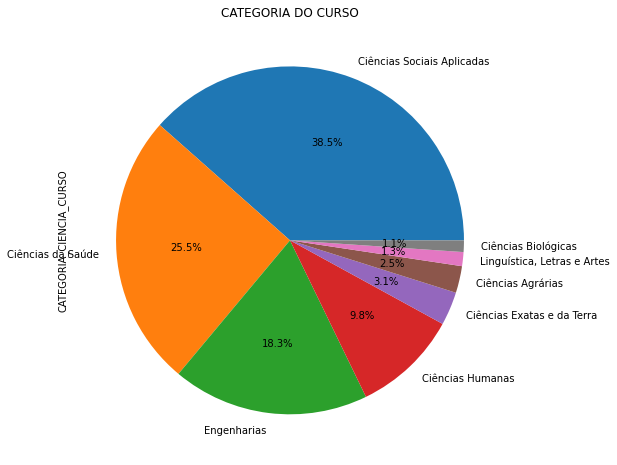

In [ ]:
plot = df5['CATEGORIA_CIENCIA_CURSO'].value_counts(normalize = True).plot.pie(autopct='%1.1f%%',figsize=(8, 8))
plot.set_title("CATEGORIA DO CURSO")

##Analisando os valores por tipo de escola de origem

In [ ]:
df5.ST_ENSINO_MEDIO_ESCOLA_PUBLICA.value_counts()

S    1007499
N     212253
P      84241
Name: ST_ENSINO_MEDIO_ESCOLA_PUBLICA, dtype: int64

Text(0.5, 1.0, 'Origem ensino médio')

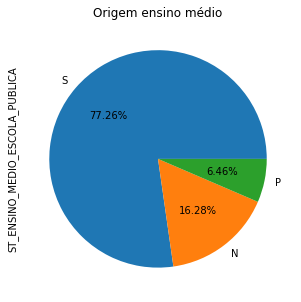

In [ ]:
#pd.set_option('display.float_format', '{:.2%}'.format)
#df5['ST_ENSINO_MEDIO_ESCOLA_PUBLICA'].value_counts(normalize = True)

plot = df5['ST_ENSINO_MEDIO_ESCOLA_PUBLICA'].value_counts(normalize = True).plot.pie(y='mass',autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Origem ensino médio")

##Analisando os valores por Sexo

In [ ]:
df5.DS_SEXO.value_counts()

Feminino     781571
Masculino    522422
Name: DS_SEXO, dtype: int64

Text(0.5, 1.0, 'Sexo dos alunos')

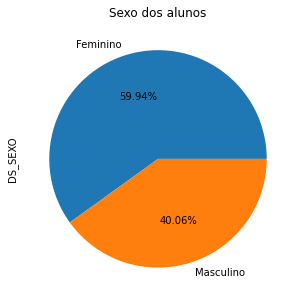

In [ ]:
plot = df5['DS_SEXO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Sexo dos alunos")

##Analisando os valores por Instituição de Ensino superior

In [ ]:
pd.set_option('display.max_rows', 1617)
df5.NO_IES.value_counts()

UNIVERSIDADE PAULISTA                          73046
UNIVERSIDADE ESTÁCIO DE SÁ                     52410
Centro Universitário Estácio do Ceará          22273
UNIVERSIDADE NOVE DE JULHO                     18661
UNIVERSIDADE DE CUIABÁ                         17488
                                               ...  
INSTITUTO SUPERIOR DE EDUCAÇÃO DE GUARATUBA        1
CENTRO UNIVERSITÁRIO DA CIDADE                     1
FACULDADE DE TECNOLOGIA PENTÁGONO                  1
FACULDADE DE TECNOLOGIA FRANCISCO MORATO           1
FACULDADE BARDDAL DE ARTES APLICADAS               1
Name: NO_IES, Length: 1617, dtype: int64

In [ ]:
pd.reset_option("^display")

##Analisando os valores por município da instituição

In [ ]:
pd.set_option('display.max_rows', 493)
df5.NO_MUNICIPIO.value_counts()

São Paulo             219058
Valinhos              117106
Belo Horizonte        108167
Rio de Janeiro         80848
Salvador               55686
                       ...  
Rondonópolis               2
Paranaguá                  1
Primavera do Leste         1
Passos                     1
Guaratuba                  1
Name: NO_MUNICIPIO, Length: 493, dtype: int64

In [ ]:
pd.reset_option("^display")

##Analisando os valores por presença de deficiência

In [ ]:
df5.ST_DEFICIENCIA.value_counts()

N    1296534
S       7459
Name: ST_DEFICIENCIA, dtype: int64

Text(0.5, 1.0, 'Presença de deficiência no aluno')

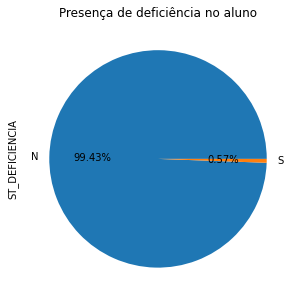

In [ ]:
plot = df5['ST_DEFICIENCIA'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Presença de deficiência no aluno")

##Analisando os valores por raça do estudante

In [ ]:
df5.DS_RACA_COR.value_counts()

Branco     584569
Pardo      537523
Negro      148690
Amarelo     30199
Índio        3012
Name: DS_RACA_COR, dtype: int64

Text(0.5, 1.0, 'Distribuição racial dos estudantes')

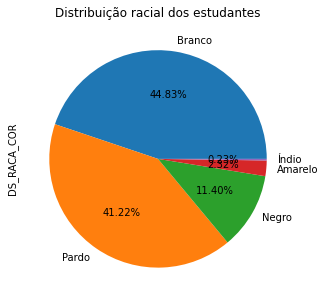

In [ ]:
plot = df5['DS_RACA_COR'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição racial dos estudantes")

##Analise do agente financeiro

In [ ]:
df5.NO_AGENTE_FINANCEIRO.value_counts()

Caixa Econômica Federal    724733
Banco do Brasil            579260
Name: NO_AGENTE_FINANCEIRO, dtype: int64

Text(0.5, 1.0, 'Distribuição dos agentes financeiros')

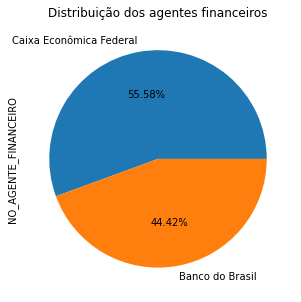

In [ ]:
plot = df5['NO_AGENTE_FINANCEIRO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos agentes financeiros")

##Analise dos estados cívies dos estudantes

In [ ]:
df5.DS_ESTADO_CIVIL.value_counts()

Solteiro         1033059
Casado            191222
União estável      35210
Divorciado         31802
Separado           10418
Viúvo               2282
Name: DS_ESTADO_CIVIL, dtype: int64

Text(0.5, 1.0, 'Distribuição dos estados cívies dos estudantes')

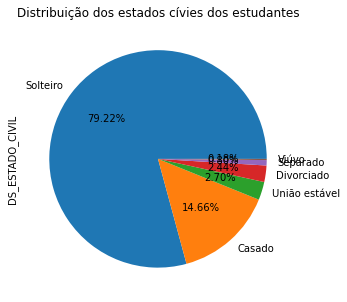

In [ ]:
plot = df5['DS_ESTADO_CIVIL'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos estados cívies dos estudantes")

##Analise da periocidade de pagamento do curso

In [ ]:
df5.DS_PERIODICIDADE_CUR.value_counts()

Semestral     1270789
Anual           32038
Trimestral       1166
Name: DS_PERIODICIDADE_CUR, dtype: int64

Text(0.5, 1.0, 'Distribuição da periocidade de pagamento do curso')

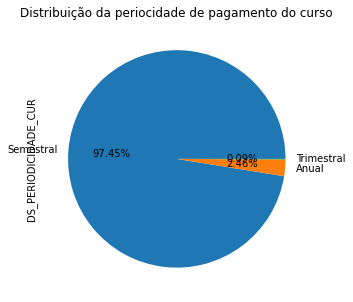

In [ ]:
plot = df5['DS_PERIODICIDADE_CUR'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição da periocidade de pagamento do curso")

##Analise da temporalidade dos pagamentos

In [ ]:
df5.NU_ANO_PROC.value_counts()

2015    1303993
Name: NU_ANO_PROC, dtype: int64

In [ ]:
df5ComLinhasDuplicads.NU_MES_PROC.value_counts()

6    1945125
5    1228106
4     925649
7     878402
2     762689
3     194458
Name: NU_MES_PROC, dtype: int64

Text(0.5, 1.0, 'Distribuição dos meses de pagamento')

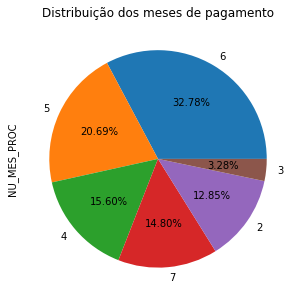

In [ ]:
plot = df5ComLinhasDuplicads['NU_MES_PROC'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos meses de pagamento")

agora analisando a temporalidade do que vai pagar

In [ ]:
df5ComLinhasDuplicads.NU_MES.value_counts()

1     991632
2     991630
3     991561
4     725173
5     720891
6     718104
12    554336
11     48343
10     48335
9      48142
7      48141
8      48141
Name: NU_MES, dtype: int64

Text(0.5, 1.0, 'Distribuição dos meses de pagamento')

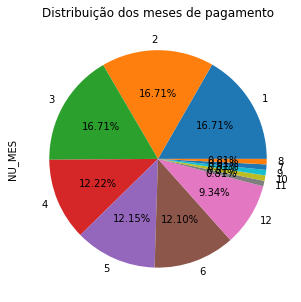

In [ ]:
plot = df5ComLinhasDuplicads['NU_MES'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos meses de pagamento")

In [ ]:
df5.NU_SEMESTRE.value_counts()

1    754449
2    549544
Name: NU_SEMESTRE, dtype: int64

Text(0.5, 1.0, 'Distribuição dos semestres referentes ao pagamento')

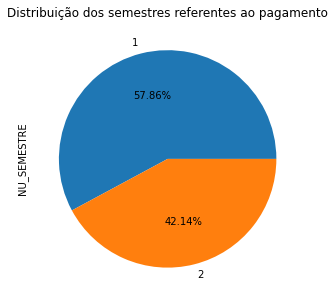

In [ ]:
plot = df5['NU_SEMESTRE'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos semestres referentes ao pagamento")

In [ ]:
df5ComLinhasDuplicads.NU_SEMESTRE.value_counts()

1    5138991
2     795438
Name: NU_SEMESTRE, dtype: int64

Text(0.5, 1.0, 'Distribuição dos semestres referentes ao pagamento')

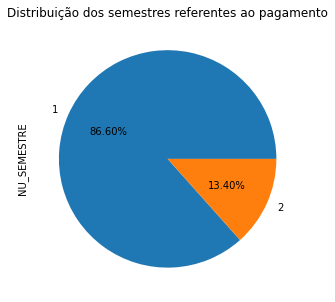

In [ ]:
plot = df5ComLinhasDuplicads['NU_SEMESTRE'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos semestres referentes ao pagamento")

In [ ]:
df5ComLinhasDuplicads.NU_ANO.value_counts()

2015    5113747
2014     805642
2013       8868
2012       3712
2011       2268
2010        192
Name: NU_ANO, dtype: int64

Text(0.5, 1.0, 'Distribuição dos anos referentes ao pagamento')

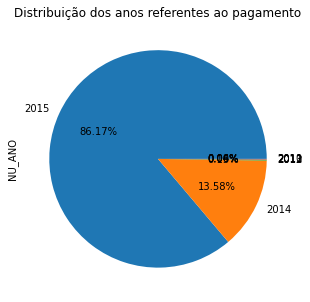

In [ ]:
plot = df5ComLinhasDuplicads['NU_ANO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos anos referentes ao pagamento")

##Analisando os tipos de financeamentos

In [ ]:
df5.TP_FIANCA.value_counts()

F    910395
N    380223
S     13375
Name: TP_FIANCA, dtype: int64

Text(0.5, 1.0, 'Distribuição do tipo de financeamento')

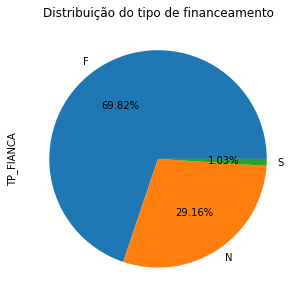

In [ ]:
plot = df5['TP_FIANCA'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição do tipo de financeamento")

##Analise dos tipos de cursos

In [ ]:
df5.DS_TIPO_CURSO.value_counts()

Bacharelado     1120220
Licenciatura     104016
Tecnológico       79757
Name: DS_TIPO_CURSO, dtype: int64

Text(0.5, 1.0, 'Distribuição dos tipos de cursos')

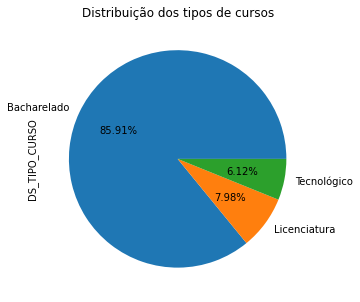

In [ ]:
plot = df5['DS_TIPO_CURSO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos tipos de cursos")

##Informações extras 

In [ ]:
df5.CO_PROCESSO.value_counts()

106    515106
109    270428
111    179654
112    138123
107     80966
113     55408
115     29954
105     29856
108      3531
110       967
Name: CO_PROCESSO, dtype: int64

In [ ]:
df5.NU_ANO_EXERCICIO_INSC.value_counts()

2014.0    524494
2013.0    337435
2015.0    203656
2012.0    178351
2011.0     49025
2010.0     10650
2009.0       343
2008.0        28
2007.0        10
2004.0         1
Name: NU_ANO_EXERCICIO_INSC, dtype: int64

In [ ]:
df5.NU_PERCENTUAL_PROUNI.value_counts()

0.0     1280611
50.0      23379
25.0          3
Name: NU_PERCENTUAL_PROUNI, dtype: int64

In [ ]:
df5.NU_PERCENT_SOLICITADO_FINANC.value_counts()

100.0    1085242
75.0       87345
50.0       82710
70.0       12219
80.0       10252
60.0       10090
90.0        5247
85.0        4032
65.0        2888
95.0        2531
55.0        1437
Name: NU_PERCENT_SOLICITADO_FINANC, dtype: int64

In [ ]:
df5.VL_REPASSE.value_counts()

31619.89    452
28132.88    345
44233.49    334
31866.38    308
33744.00    275
           ... 
47147.98      1
44115.69      1
32157.43      1
21302.11      1
18629.03      1
Name: VL_REPASSE, Length: 845928, dtype: int64

In [ ]:
df5.VL_PERC_FINANCIAMENTO.value_counts()

100.0    1085242
75.0       87345
50.0       82710
70.0       12219
80.0       10252
60.0       10090
90.0        5247
85.0        4032
65.0        2888
95.0        2531
55.0        1437
Name: VL_PERC_FINANCIAMENTO, dtype: int64

In [ ]:
df5.QT_SEMESTRE_FINANCIADO.value_counts()

10.0    534030
8.0     324882
6.0      94430
9.0      83192
7.0      80470
4.0      64728
5.0      49410
12.0     26361
3.0      17996
11.0     17660
2.0       7669
13.0      1786
1.0       1056
16.0       167
14.0       123
15.0        31
19.0         1
18.0         1
Name: QT_SEMESTRE_FINANCIADO, dtype: int64

##Analise do valor repassado

###Analise do valor repassado, utilizando a metrica VL_REPASSE

In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
df5.VL_REPASSE.sum()

39459288166.10001

In [ ]:
df5.groupby('SG_UF').sum()['VL_REPASSE'].sort_values(ascending=False)

SG_UF
SP   12387153877.340
MG    5283154034.780
RJ    2885603433.260
BA    2620693710.880
MT    2109732274.350
RS    1681440033.370
PR    1593167259.930
CE    1357145320.630
DF    1264613057.760
PB    1137887699.460
PE    1026594178.570
GO     858382640.240
SC     700462531.960
RN     606899276.950
ES     513025058.810
MA     468571123.770
PI     442923326.760
AM     409669680.770
PA     388931370.630
AP     343822067.680
AC     336975651.490
RO     297323457.570
MS     205881783.010
SE     186773322.910
AL     157301583.480
RR     108158750.620
TO      87001659.120
Name: VL_REPASSE, dtype: float64

In [ ]:
df5_vl_estados_interativo = df5.groupby('SG_UF').sum()['VL_REPASSE'].sort_values(ascending=False)

data_por_genero_interativo = [go.Bar(x=df5_vl_estados_interativo.index,
               y=df5_vl_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='Valor repassado por estado',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor por estado')

plt.show()

In [ ]:
df5.groupby('REGIAO').sum()['VL_REPASSE'].sort_values(ascending=False)

REGIAO
SUDESTE        21068936404.190
NORDESTE        8004789543.410
CENTRO-OESTE    4438609755.360
SUL             3975069825.260
NORTE           1971882637.880
Name: VL_REPASSE, dtype: float64

In [ ]:
df5_vl_regiao_interativo = df5.groupby('REGIAO').sum()['VL_REPASSE'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df5_vl_regiao_interativo.index,
               y=df5_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por região',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por região')

plt.show()

In [ ]:
df5.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VL_REPASSE'].sort_values(ascending=False)

CATEGORIA_CIENCIA_CURSO
Ciências da Saúde             14011490560.870
Ciências Sociais Aplicadas    12329259883.000
Engenharias                    7278803483.830
Ciências Humanas               3100161851.650
Ciências Agrárias              1331656973.040
Ciências Exatas e da Terra      769354383.000
Linguística, Letras e Artes     370296942.410
Ciências Biológicas             268264088.300
Name: VL_REPASSE, dtype: float64

In [ ]:
df5_vl_regiao_interativo = df5.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VL_REPASSE'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df5_vl_regiao_interativo.index,
               y=df5_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por categoria do curso',
                                 yaxis={'title':'Categoria'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por categoria')

plt.show()

In [ ]:
pd.reset_option("^display")

###Analise do valor repassado, utilizando a metrica VALOR_SEMESTRE_PAGO

In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
df5.VALOR_SEMESTRE_PAGO.sum()

5077751533.34

In [ ]:
df5.groupby('SG_UF').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

SG_UF
SP   1528671700.420
MG    638555743.360
BA    331794105.810
RJ    290926435.900
PR    257865735.810
RS    248569778.590
MT    226129814.610
DF    212060873.930
CE    193303927.330
PB    168632678.500
GO    128215872.260
PE    117499939.370
SC    110323146.550
ES     84765496.790
MA     71835753.270
PA     58692019.480
AM     56407034.340
PI     55440448.900
AC     54701689.120
RO     51129871.970
RN     50498662.880
SE     34937253.020
MS     32821509.790
AP     30788836.520
AL     21504984.020
RR     11044678.070
TO     10633542.730
Name: VALOR_SEMESTRE_PAGO, dtype: float64

In [ ]:
df5_vl_estados_interativo = df5.groupby('SG_UF').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

data_por_genero_interativo = [go.Bar(x=df5_vl_estados_interativo.index,
               y=df5_vl_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='Valor repassado por estado',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor por estado')

plt.show()

In [ ]:
df5.groupby('REGIAO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

REGIAO
SUDESTE        2542919376.470
NORDESTE       1045447753.100
SUL             616758660.950
CENTRO-OESTE    599228070.590
NORTE           273397672.230
Name: VALOR_SEMESTRE_PAGO, dtype: float64

In [ ]:
df5_vl_regiao_interativo = df5.groupby('REGIAO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df5_vl_regiao_interativo.index,
               y=df5_vl_regiao_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por região',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por região')

plt.show()

In [ ]:
df5.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

CATEGORIA_CIENCIA_CURSO
Ciências da Saúde             1803974155.690
Ciências Sociais Aplicadas    1578167666.130
Engenharias                    927637861.410
Ciências Humanas               377808478.640
Ciências Agrárias              191679163.820
Ciências Exatas e da Terra     110554695.560
Linguística, Letras e Artes     49762322.060
Ciências Biológicas             38167190.030
Name: VALOR_SEMESTRE_PAGO, dtype: float64

In [ ]:
df5_vl_regiao_interativo = df5.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df5_vl_regiao_interativo.index,
               y=df5_vl_regiao_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por categoria do curso',
                                 yaxis={'title':'Categoria'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por categoria')

plt.show()

In [ ]:
pd.reset_option("^display")

###Analise do valor repassado, utilizando a metrica VALOR_ARQUIVO_PAGO

In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
df5.VALOR_ARQUIVO_PAGO.sum()

5149397180.309999

In [ ]:
df5.groupby('SG_UF').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

SG_UF
SP   1543929165.400
MG    644592664.760
BA    346147912.660
RJ    293839236.120
PR    259000264.370
RS    251520478.280
MT    227393602.840
DF    219674192.670
CE    195626961.760
PB    173352350.480
GO    129603506.990
PE    120294843.240
SC    111408927.890
ES     85239679.460
MA     72147117.250
PA     60302416.250
AM     56801174.400
PI     56110619.020
AC     54934715.440
RO     51591175.840
RN     51239244.810
SE     35822971.880
MS     33211163.980
AP     31119698.450
AL     22103104.150
RR     11700524.750
TO     10689467.170
Name: VALOR_ARQUIVO_PAGO, dtype: float64

In [ ]:
df5_vl_estados_interativo = df5.groupby('SG_UF').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

data_por_genero_interativo = [go.Bar(x=df5_vl_estados_interativo.index,
               y=df5_vl_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='Valor repassado por estado',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor por estado')

plt.show()

In [ ]:
df5.groupby('REGIAO').sum()['VL_REPASSE'].sort_values(ascending=False)

REGIAO
SUDESTE        21068936404.190
NORDESTE        8004789543.410
CENTRO-OESTE    4438609755.360
SUL             3975069825.260
NORTE           1971882637.880
Name: VL_REPASSE, dtype: float64

In [ ]:
df5_vl_regiao_interativo = df5.groupby('REGIAO').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df5_vl_regiao_interativo.index,
               y=df5_vl_regiao_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por região',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por região')

plt.show()

In [ ]:
df5.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

CATEGORIA_CIENCIA_CURSO
Ciências da Saúde             1829803556.420
Ciências Sociais Aplicadas    1599777481.540
Engenharias                    940203942.470
Ciências Humanas               384706393.990
Ciências Agrárias              194198645.860
Ciências Exatas e da Terra     111630188.630
Linguística, Letras e Artes     50457589.390
Ciências Biológicas             38619382.010
Name: VALOR_ARQUIVO_PAGO, dtype: float64

In [ ]:
df5_vl_regiao_interativo = df5.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df5_vl_regiao_interativo.index,
               y=df5_vl_regiao_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por categoria do curso',
                                 yaxis={'title':'Categoria'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por categoria')

plt.show()

In [ ]:
pd.reset_option("^display")

#Analises de 2015.2

##Analisando os valores por estado.

In [ ]:
df14.SG_UF.value_counts()

SP    459430
MG    162405
RJ    108095
BA     81826
RS     64383
PR     57064
MT     50368
DF     43163
CE     41702
PE     41413
GO     35793
PB     35263
SC     32764
MA     21013
RN     20698
AM     19679
ES     17897
SE     17180
PI     17082
PA     15653
RO     10352
AP      9476
AC      9070
MS      9067
AL      8875
RR      4997
TO      2383
Name: SG_UF, dtype: int64

In [ ]:
df14_estados_interativo = df14.SG_UF.value_counts()

data_por_genero_interativo = [go.Bar(x=df14_estados_interativo.index,
               y=df14_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='quantidade de estudantes por estado',
                                 yaxis={'title':'quantidade de alunos'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='estudantes por estado')

plt.show()

##Analisando os valores por região

In [ ]:
df14.REGIAO.value_counts()

SUDESTE         747827
NORDESTE        285052
SUL             154211
CENTRO-OESTE    138391
NORTE            71610
Name: REGIAO, dtype: int64

In [ ]:
df14_regiao_interativo = df14.REGIAO.value_counts()

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df14_regiao_interativo.index,
               y=df14_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='quantidade de estudantes por região',
                                 yaxis={'title':'quantidade de alunos'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='estudantes por região')

plt.show()

##Analisando os valores por curso

In [ ]:
pd.set_option('display.max_rows', 364)
df14.DS_CURSO.value_counts()

DIREITO                             234523
ENGENHARIA CIVIL                    114182
ADMINISTRAÇÃO                       101226
ENFERMAGEM                          100546
PSICOLOGIA                           73430
                                     ...  
SEGURANÇA NO TRÂNSITO                    1
MÍDIAS SOCIAIS DIGITAIS                  1
GESTÃO EMPRESARIAL                       1
GESTÃO DE SISTEMAS DE INFORMAÇÃO         1
CIÊNCIAS AMBIENTAIS                      1
Name: DS_CURSO, Length: 364, dtype: int64

In [ ]:
pd.reset_option("^display")

In [ ]:
df14_curso_interativo = df14.DS_CURSO.value_counts()

cores2 = sns.color_palette("Paired")

data_por_curso_interativo = [go.Bar(x=df14_curso_interativo.index,
               y=df14_curso_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='quantidade de estudantes por curso',
                                 yaxis={'title':'quantidade de alunos'},
                                 xaxis={'title': 'curso'}                              
                                )

fig = go.Figure(data = data_por_curso_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='estudantes por curso')

plt.show()

##Analisando os valores por categoria do curso

In [ ]:
df14.CATEGORIA_CIENCIA_CURSO.value_counts()

Ciências Sociais Aplicadas     531785
Ciências da Saúde              362250
Engenharias                    257544
Ciências Humanas               136244
Ciências Exatas e da Terra      40710
Ciências Agrárias               36513
Linguística, Letras e Artes     17921
Ciências Biológicas             14124
Name: CATEGORIA_CIENCIA_CURSO, dtype: int64

Text(0.5, 1.0, 'CATEGORIA DO CURSO')

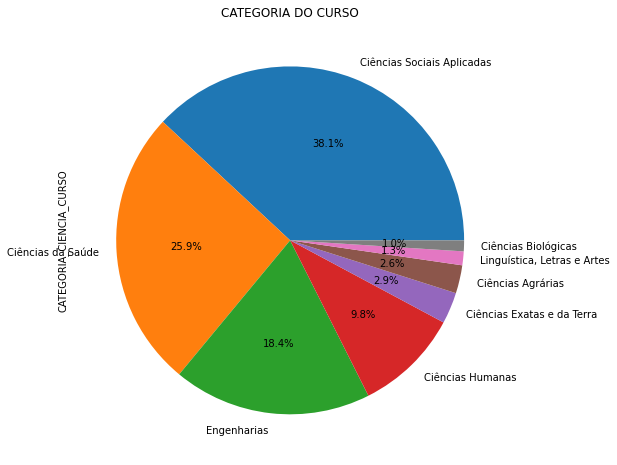

In [ ]:
plot = df14['CATEGORIA_CIENCIA_CURSO'].value_counts(normalize = True).plot.pie(autopct='%1.1f%%',figsize=(8, 8))
plot.set_title("CATEGORIA DO CURSO")

##Analisando os valores por tipo de escola de origem

In [ ]:
df14.ST_ENSINO_MEDIO_ESCOLA_PUBLICA.value_counts()

S    1062420
N     243170
P      91501
Name: ST_ENSINO_MEDIO_ESCOLA_PUBLICA, dtype: int64

Text(0.5, 1.0, 'Origem ensino médio')

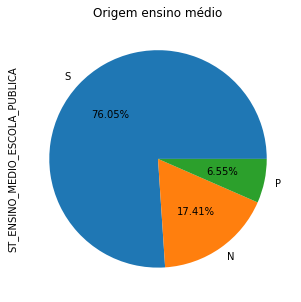

In [ ]:
plot = df14['ST_ENSINO_MEDIO_ESCOLA_PUBLICA'].value_counts(normalize = True).plot.pie(y='mass',autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Origem ensino médio")

##Analisando os valores por Sexo

In [ ]:
df14.DS_SEXO.value_counts()

Feminino     839141
Masculino    557950
Name: DS_SEXO, dtype: int64

Text(0.5, 1.0, 'Sexo dos alunos')

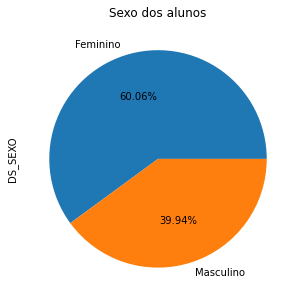

In [ ]:
plot = df14['DS_SEXO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Sexo dos alunos")

##Analisando os valores por Instituição de Ensino superior

In [ ]:
pd.set_option('display.max_rows', 1638)
df14.NO_IES.value_counts()

UNIVERSIDADE PAULISTA                                         69976
UNIVERSIDADE ESTÁCIO DE SÁ                                    52404
Centro Universitário Estácio do Ceará                         22139
UNIVERSIDADE NOVE DE JULHO                                    20573
UNIVERSIDADE DE CUIABÁ                                        15052
                                                              ...  
INSTITUTO SUPERIOR DE ENSINO E PESQUISA DE CAMBUÍ                 1
Faculdade de Tecnologia SENAC Criciúma                            1
FACULDADE SÃO TOMAZ DE AQUINO                                     1
FACULDADE DE SAÚDE SANTO AGOSTINHO DE VITÓRIA DA CONQUISTA        1
INSTITUTO SUPERIOR DE EDUCAÇÃO ANGLO-AMERICANO                    1
Name: NO_IES, Length: 1638, dtype: int64

In [ ]:
pd.reset_option("^display")

##Analisando os valores por município da instituição

In [ ]:
pd.set_option('display.max_rows', 495)
df14.NO_MUNICIPIO.value_counts()

São Paulo         225222
Valinhos          121482
Belo Horizonte    107567
Rio de Janeiro     83537
Salvador           49156
                   ...  
Rio Claro              1
Juatuba                1
Piraju                 1
Paranaguá              1
Monte Santo            1
Name: NO_MUNICIPIO, Length: 495, dtype: int64

In [ ]:
pd.reset_option("^display")

##Analisando os valores por presença de deficiência

In [ ]:
df14.ST_DEFICIENCIA.value_counts()

N    1389221
S       7870
Name: ST_DEFICIENCIA, dtype: int64

Text(0.5, 1.0, 'Presença de deficiência no aluno')

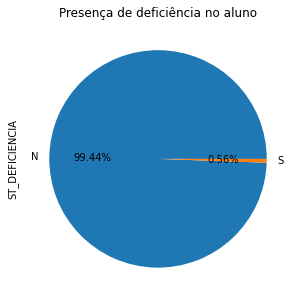

In [ ]:
plot = df14['ST_DEFICIENCIA'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Presença de deficiência no aluno")

##Analisando os valores por raça do estudante

In [ ]:
df14.DS_RACA_COR.value_counts()

Branco     650331
Pardo      559771
Negro      152345
Amarelo     31609
Índio        3035
Name: DS_RACA_COR, dtype: int64

Text(0.5, 1.0, 'Distribuição racial dos estudantes')

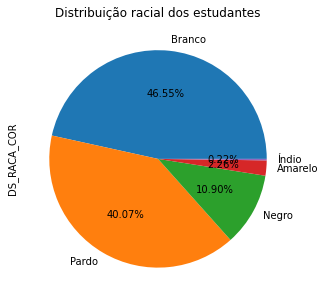

In [ ]:
plot = df14['DS_RACA_COR'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição racial dos estudantes")

##Analise do agente financeiro

In [ ]:
df14.NO_AGENTE_FINANCEIRO.value_counts()

Caixa Econômica Federal    775186
Banco do Brasil            621905
Name: NO_AGENTE_FINANCEIRO, dtype: int64

Text(0.5, 1.0, 'Distribuição dos agentes financeiros')

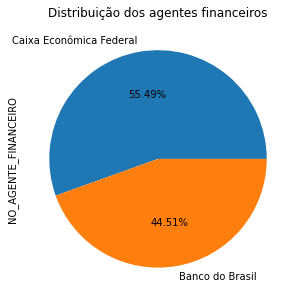

In [ ]:
plot = df14['NO_AGENTE_FINANCEIRO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos agentes financeiros")

##Analise dos estados cívies dos estudantes

In [ ]:
df14.DS_ESTADO_CIVIL.value_counts()

Solteiro         1118569
Casado            195619
União estável      37480
Divorciado         32431
Separado           10688
Viúvo               2304
Name: DS_ESTADO_CIVIL, dtype: int64

Text(0.5, 1.0, 'Distribuição dos estados cívies dos estudantes')

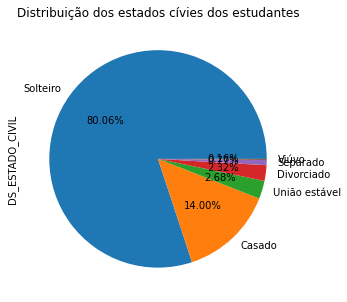

In [ ]:
plot = df14['DS_ESTADO_CIVIL'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos estados cívies dos estudantes")

##Analise da periocidade de pagamento do curso

In [ ]:
df14.DS_PERIODICIDADE_CUR.value_counts()

Semestral     1356281
Anual           39644
Trimestral       1166
Name: DS_PERIODICIDADE_CUR, dtype: int64

Text(0.5, 1.0, 'Distribuição da periocidade de pagamento do curso')

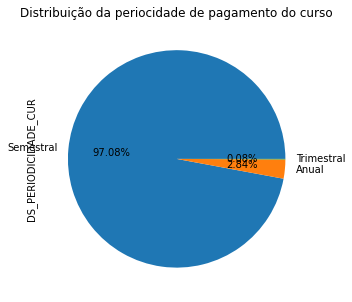

In [ ]:
plot = df14['DS_PERIODICIDADE_CUR'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição da periocidade de pagamento do curso")




























##Analise da temporalidade dos pagamentos

In [ ]:
df14.NU_ANO_PROC.value_counts()

2015    1382625
2016      14466
Name: NU_ANO_PROC, dtype: int64

In [ ]:
df14ComLinhasDuplicads.NU_MES_PROC.value_counts()

10    2195916
11    1823238
8     1253005
12    1249883
9     1063796
1      937168
Name: NU_MES_PROC, dtype: int64

Text(0.5, 1.0, 'Distribuição dos meses de pagamento')

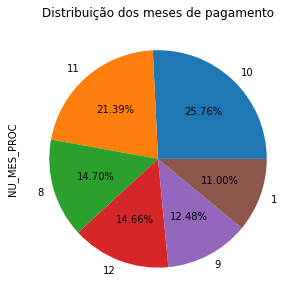

In [ ]:
plot = df14ComLinhasDuplicads['NU_MES_PROC'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos meses de pagamento")

agora analisando a temporalidade do que vai pagar

In [ ]:
df14ComLinhasDuplicads.NU_MES.value_counts()

7     842948
8     842943
9     841270
10    840030
11    829516
12    827515
5     715828
4     715313
6     713319
3     451450
2     451437
1     451437
Name: NU_MES, dtype: int64

Text(0.5, 1.0, 'Distribuição dos meses de pagamento')

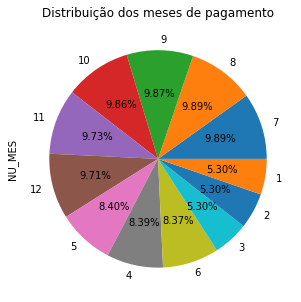

In [ ]:
plot = df14ComLinhasDuplicads['NU_MES'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos meses de pagamento")

In [ ]:
df14.NU_SEMESTRE.value_counts()

1    705150
2    691941
Name: NU_SEMESTRE, dtype: int64

Text(0.5, 1.0, 'Distribuição dos semestres referentes ao pagamento')

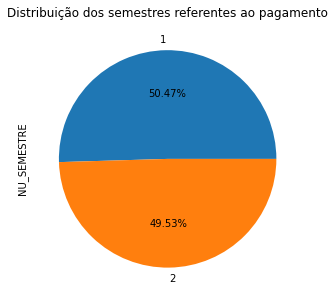

In [ ]:
plot = df14['NU_SEMESTRE'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos semestres referentes ao pagamento")

In [ ]:
df14ComLinhasDuplicads.NU_SEMESTRE.value_counts()

2    5024222
1    3498784
Name: NU_SEMESTRE, dtype: int64

Text(0.5, 1.0, 'Distribuição dos semestres referentes ao pagamento')

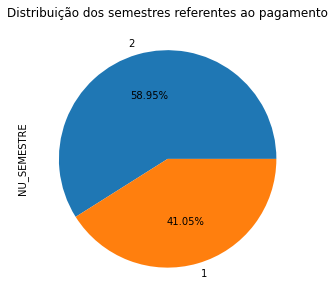

In [ ]:
plot = df14ComLinhasDuplicads['NU_SEMESTRE'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos semestres referentes ao pagamento")

In [ ]:
df14ComLinhasDuplicads.NU_ANO.value_counts()

2015    8473981
2014      37184
2013       6945
2012       3114
2011       1014
2010        768
Name: NU_ANO, dtype: int64

Text(0.5, 1.0, 'Distribuição dos anos referentes ao pagamento')

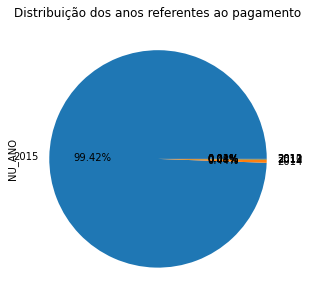

In [ ]:
plot = df14ComLinhasDuplicads['NU_ANO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos anos referentes ao pagamento")

##Analisando os tipos de financeamentos

In [ ]:
df14.TP_FIANCA.value_counts()

F    936813
N    448298
S     11980
Name: TP_FIANCA, dtype: int64

Text(0.5, 1.0, 'Distribuição do tipo de financeamento')

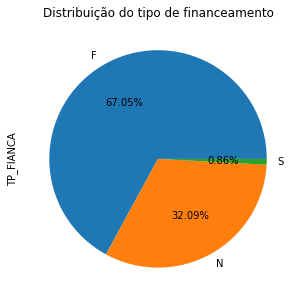

In [ ]:
plot = df14['TP_FIANCA'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição do tipo de financeamento")

##Analise dos tipos de cursos

In [ ]:
df14.DS_TIPO_CURSO.value_counts()

Bacharelado     1217973
Licenciatura     107146
Tecnológico       71971
Sequencial            1
Name: DS_TIPO_CURSO, dtype: int64

Text(0.5, 1.0, 'Distribuição dos tipos de cursos')

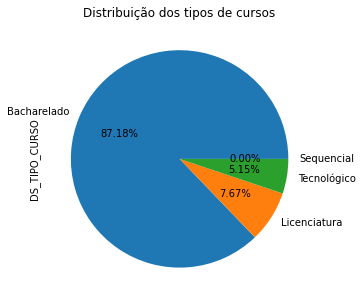

In [ ]:
plot = df14['DS_TIPO_CURSO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos tipos de cursos")

##Informações extras 

In [ ]:
df14.CO_PROCESSO.value_counts()

148    440698
116    415308
154    156443
163     45687
129     44245
130     42945
127     42270
160     39017
159     28061
144     25995
150     14901
168     14466
149     12977
125     11501
134     11029
162     10716
128      9524
136      8826
164      5488
151      4708
167      3066
161      2221
166      2131
137      1794
135      1103
153       783
126       712
131       356
152        66
165        54
Name: CO_PROCESSO, dtype: int64

In [ ]:
df14.NU_ANO_EXERCICIO_INSC.value_counts()

2014.0    555685
2013.0    348004
2015.0    253982
2012.0    182597
2011.0     47941
2010.0      8676
2009.0       179
2008.0        19
2007.0         6
2001.0         1
2005.0         1
Name: NU_ANO_EXERCICIO_INSC, dtype: int64

In [ ]:
df14.NU_PERCENTUAL_PROUNI.value_counts()

0.0     1368110
50.0      28980
25.0          1
Name: NU_PERCENTUAL_PROUNI, dtype: int64

In [ ]:
df14.NU_PERCENT_SOLICITADO_FINANC.value_counts()

100.0    1131573
75.0       98394
50.0       90723
70.0       14588
80.0       12872
          ...   
26.0           3
21.0           2
16.0           2
23.0           1
10.0           1
Name: NU_PERCENT_SOLICITADO_FINANC, Length: 84, dtype: int64

In [ ]:
df14.VL_REPASSE.value_counts()

31619.89    457
28132.88    346
44233.49    334
31866.38    310
33744.00    277
           ... 
3352.53       1
19363.14      1
25001.46      1
28516.41      1
11685.28      1
Name: VL_REPASSE, Length: 914063, dtype: int64

In [ ]:
df14.VL_PERC_FINANCIAMENTO.value_counts()

100.0    1131573
75.0       98394
50.0       90723
70.0       14588
80.0       12872
          ...   
26.0           3
21.0           2
16.0           2
23.0           1
10.0           1
Name: VL_PERC_FINANCIAMENTO, Length: 84, dtype: int64

In [ ]:
df14.QT_SEMESTRE_FINANCIADO.value_counts()

10.0    576766
8.0     342731
9.0     100814
6.0      97517
7.0      88959
4.0      57329
5.0      50175
12.0     35017
11.0     23528
3.0      15320
2.0       4864
13.0      3111
1.0        554
14.0       187
16.0       165
15.0        46
17.0         3
18.0         3
24.0         1
19.0         1
Name: QT_SEMESTRE_FINANCIADO, dtype: int64

##Analise do valor repassado

###Analise do valor repassado, utilizando a metrica VL_REPASSE

In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
df14.VL_REPASSE.sum()

44451268471.68999

In [ ]:
df14.groupby('SG_UF').sum()['VL_REPASSE'].sort_values(ascending=False)

SG_UF
SP   13576199106.310
MG    5657895367.630
RJ    3238362404.490
RS    2710652470.130
BA    2508830422.950
PR    2136077352.150
MT    1920128665.200
CE    1482902083.540
DF    1385945811.000
SC    1199945648.580
PB    1179847709.050
GO    1119351075.550
PE    1037204000.890
ES     693549499.430
RN     590993641.960
MA     526509960.330
PI     514090406.690
SE     487109239.570
PA     441533483.910
AM     416157238.380
RO     360813075.540
AC     332704877.160
AP     312687734.660
MS     220442719.480
AL     209426473.920
RR     106658064.830
TO      85249938.360
Name: VL_REPASSE, dtype: float64

In [ ]:
df14_vl_estados_interativo = df14.groupby('SG_UF').sum()['VL_REPASSE'].sort_values(ascending=False)

data_por_genero_interativo = [go.Bar(x=df14_vl_estados_interativo.index,
               y=df14_vl_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='Valor repassado por estado',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor por estado')

plt.show()

In [ ]:
df14.groupby('REGIAO').sum()['VL_REPASSE'].sort_values(ascending=False)

REGIAO
SUDESTE        23166006377.860
NORDESTE        8536913938.900
SUL             6046675470.860
CENTRO-OESTE    4645868271.230
NORTE           2055804412.840
Name: VL_REPASSE, dtype: float64

In [ ]:
df14_vl_regiao_interativo = df14.groupby('REGIAO').sum()['VL_REPASSE'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df14_vl_regiao_interativo.index,
               y=df14_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por região',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por região')

plt.show()

In [ ]:
df14.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VL_REPASSE'].sort_values(ascending=False)

CATEGORIA_CIENCIA_CURSO
Ciências da Saúde             16322806134.890
Ciências Sociais Aplicadas    13611388415.360
Engenharias                    8081160527.540
Ciências Humanas               3382298451.600
Ciências Agrárias              1557031084.030
Ciências Exatas e da Terra      817516259.810
Linguística, Letras e Artes     399854401.430
Ciências Biológicas             279213197.030
Name: VL_REPASSE, dtype: float64

In [ ]:
df14_vl_regiao_interativo = df14.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VL_REPASSE'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df14_vl_regiao_interativo.index,
               y=df14_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por categoria do curso',
                                 yaxis={'title':'Categoria'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por categoria')

plt.show()

In [ ]:
pd.reset_option("^display")

###Analise do valor repassado, utilizando a metrica VALOR_SEMESTRE_PAGO

In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
df14.VALOR_SEMESTRE_PAGO.sum()

6987112501.550002

In [ ]:
df14.groupby('SG_UF').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

SG_UF
SP   2172796828.370
MG    820821014.990
RJ    517204316.100
RS    434152034.180
BA    390893714.720
PR    340869190.240
MT    261978862.710
DF    245575751.330
CE    233910806.460
SC    195879468.130
PB    188788993.360
GO    187478245.320
PE    154073553.250
ES    110258900.850
MA     90437924.530
RN     85713887.270
SE     83398664.400
PI     73330540.850
PA     70598767.750
AM     65326365.660
RO     62342815.640
AC     54842865.970
AP     46291475.530
MS     37661968.830
AL     33266726.700
RR     17145764.090
TO     12073054.320
Name: VALOR_SEMESTRE_PAGO, dtype: float64

In [ ]:
df14_vl_estados_interativo = df14.groupby('SG_UF').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

data_por_genero_interativo = [go.Bar(x=df14_vl_estados_interativo.index,
               y=df14_vl_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='Valor repassado por estado',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor por estado')

plt.show()

In [ ]:
df14.groupby('REGIAO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

REGIAO
SUDESTE        3621081060.310
NORDESTE       1333814811.540
SUL             970900692.550
CENTRO-OESTE    732694828.190
NORTE           328621108.960
Name: VALOR_SEMESTRE_PAGO, dtype: float64

In [ ]:
df14_vl_regiao_interativo = df14.groupby('REGIAO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df14_vl_regiao_interativo.index,
               y=df14_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por região',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por região')

plt.show()

In [ ]:
df14.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

CATEGORIA_CIENCIA_CURSO
Ciências da Saúde             2507753989.590
Ciências Sociais Aplicadas    2175622674.550
Engenharias                   1274340496.100
Ciências Humanas               517270278.560
Ciências Agrárias              252614508.100
Ciências Exatas e da Terra     142807090.310
Linguística, Letras e Artes     67488319.460
Ciências Biológicas             49215144.880
Name: VALOR_SEMESTRE_PAGO, dtype: float64

In [ ]:
df14_vl_regiao_interativo = df14.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df14_vl_regiao_interativo.index,
               y=df14_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por categoria do curso',
                                 yaxis={'title':'Categoria'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por categoria')

plt.show()

In [ ]:
pd.reset_option("^display")

###Analise do valor repassado, utilizando a metrica VALOR_ARQUIVO_PAGO

In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
df14.VALOR_ARQUIVO_PAGO.sum()

7986082474.779999

In [ ]:
df14.groupby('SG_UF').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

SG_UF
SP   2408987748.520
MG    928710945.530
RS    596585226.730
RJ    566165540.100
BA    422562952.490
PR    422464434.030
DF    278695179.830
SC    270887814.850
MT    267908679.620
CE    260723980.430
GO    230352526.030
PB    201628381.480
PE    162826421.080
ES    134321781.240
SE    126773929.060
MA    102283099.620
RN     87988845.370
PI     84720457.970
PA     75769058.380
RO     72263791.780
AM     69846805.150
AC     55752499.340
AP     46740100.820
AL     41187198.910
MS     40220999.780
RR     17296978.620
TO     12417098.020
Name: VALOR_ARQUIVO_PAGO, dtype: float64

In [ ]:
df14_vl_estados_interativo = df14.groupby('SG_UF').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

data_por_genero_interativo = [go.Bar(x=df14_vl_estados_interativo.index,
               y=df14_vl_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='Valor repassado por estado',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor por estado')

plt.show()

In [ ]:
df14.groupby('REGIAO').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

REGIAO
SUDESTE        4038186015.390
NORDESTE       1490695266.410
SUL            1289937475.610
CENTRO-OESTE    817177385.260
NORTE           350086332.110
Name: VALOR_ARQUIVO_PAGO, dtype: float64

In [ ]:
df14_vl_regiao_interativo = df14.groupby('REGIAO').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df14_vl_regiao_interativo.index,
               y=df14_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por região',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por região')

plt.show()

In [ ]:
df14.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

CATEGORIA_CIENCIA_CURSO
Ciências da Saúde             2908547062.930
Ciências Sociais Aplicadas    2461206634.150
Engenharias                   1446859845.210
Ciências Humanas               581099575.290
Ciências Agrárias              293834823.340
Ciências Exatas e da Terra     161350529.480
Linguística, Letras e Artes     78342011.370
Ciências Biológicas             54841993.010
Name: VALOR_ARQUIVO_PAGO, dtype: float64

In [ ]:
df14_vl_regiao_interativo = df14.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df14_vl_regiao_interativo.index,
               y=df14_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por categoria do curso',
                                 yaxis={'title':'Categoria'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por categoria')

plt.show()

In [ ]:
pd.reset_option("^display")